In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
import numpy as np 
import os
#from spindle_tracker.signal.fft import get_fft_downsampled, filter_signal, get_fft
import statsmodels as sm

In [2]:
from heapq import *
 
def n_premiers(generator, n=10):
    result = []
    for elt in iter(generator):
        if len(result) < n:
            heappush(result, elt)
        elif elt > result[0]:
            heapreplace(result, elt)
    return [heappop(result) for i in range(n)]

def distance(x1, y1, x2, y2) : 
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

def middle_position (x1, y1, x2, y2) : 
    xposition = x1 + (x2-x1)/2
    yposition = y1 + (y2-y1)/2
    return (xposition, yposition)


def start_oscillation (couple1, couple2):

    allattached1 = couple1 [ couple1["attached\\attached"]>=1 ]
    allattached2 = couple2 [ couple2["attached\\attached"]>=1 ]
    minTimeAttached1 = allattached1["time"].min()
    minTimeAttached2 = allattached2["time"].min()

    start_oscillation = max(minTimeAttached1, minTimeAttached2) 

    return start_oscillation


def end_oscillation(solid):
    dist = distance(solid["x"], solid["y"], solid["x.1"], solid["y.1"])    
    
    solid = solid.assign(dist=dist.values)
    dist = solid[solid["dist"]>=2]
    
    end_oscillation = dist["time"].min()
    
    return end_oscillation

def centrage(solid):
    (x_kt, y_kt)= middle_kinetochore_position(data_solid["x.2"],data_solid["y.2"],data_solid["x.3"],data_solid["y.3"])
    (x_spb, y_spb)= middle_kinetochore_position(data_solid["x"],data_solid["y"],data_solid["x.1"],data_solid["y.1"])
    
    d = distance(x_spb, y_spb, x_kt, y_kt)
    return d

def stretch(solid):
    d=distance(data_solid["x.2"],data_solid["y.2"],data_solid["x.3"],data_solid["y.3"])
    return d

0800_1600_005_120_200_010


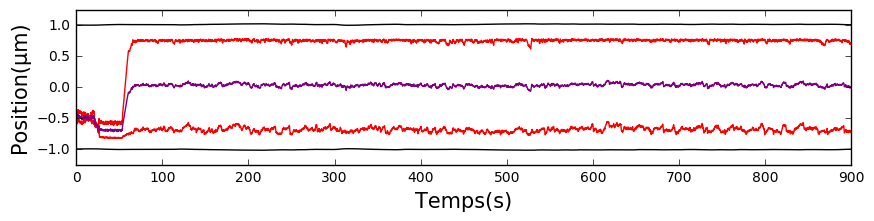

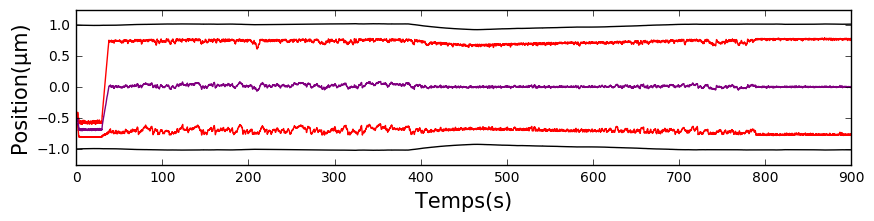

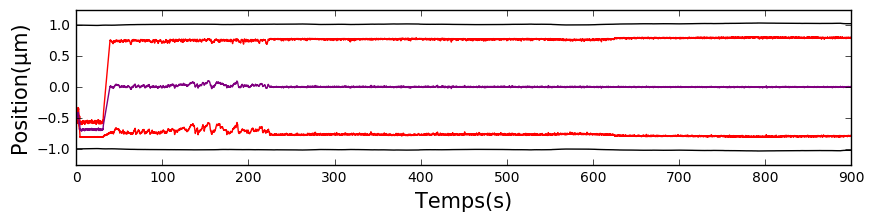

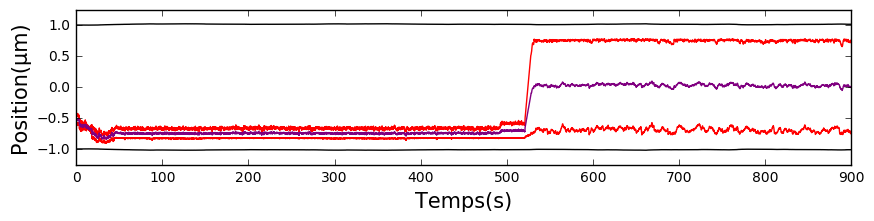

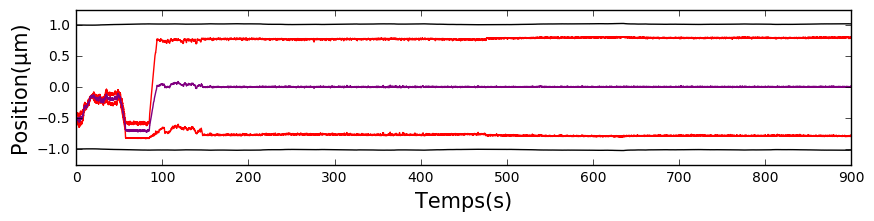

1600_1600_150_250_100_050


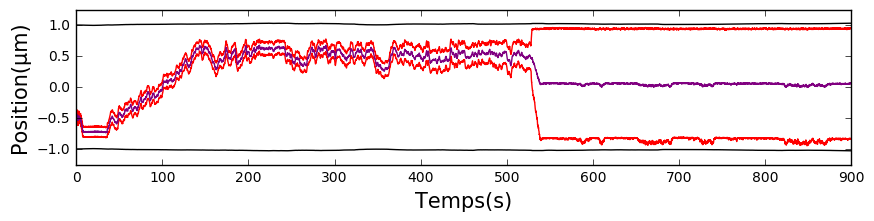

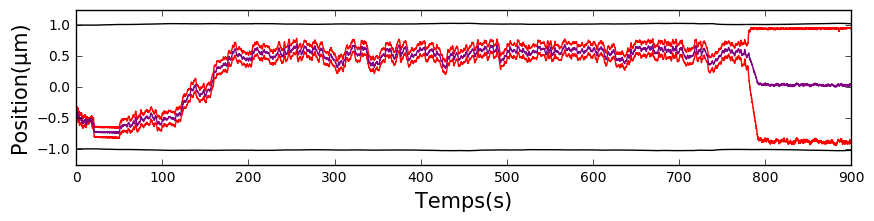

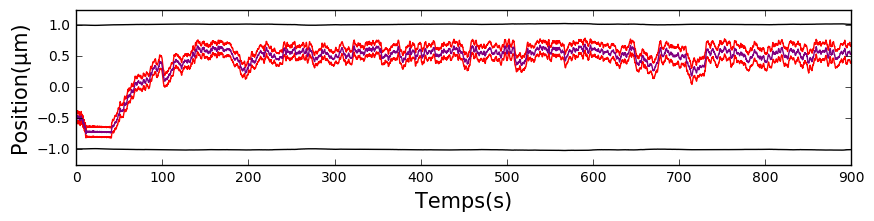

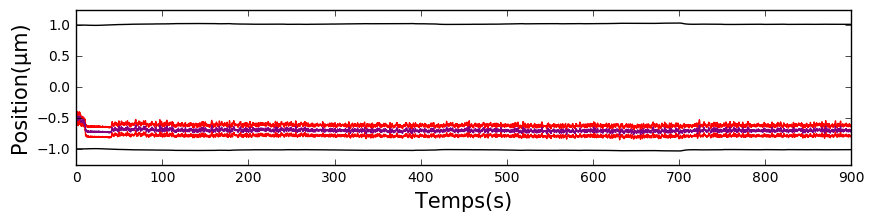

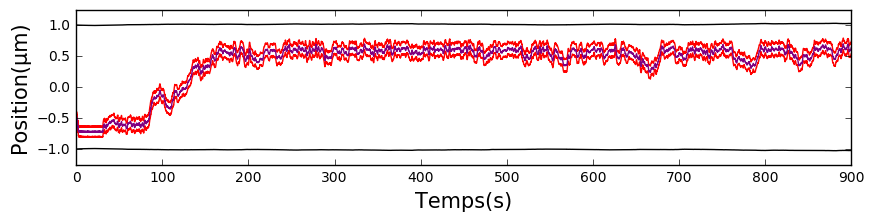

0800_0017_150_005_020_090


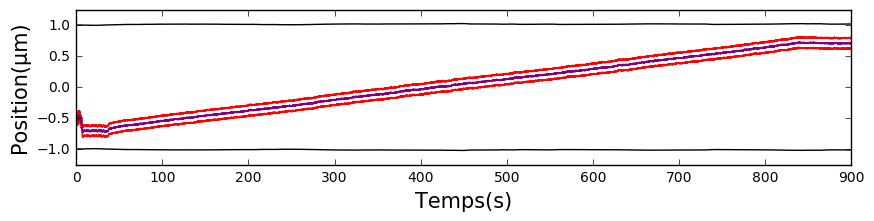

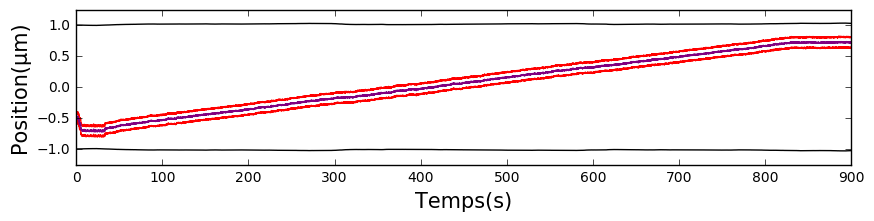

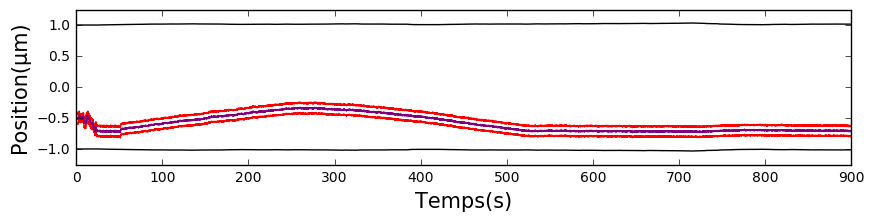

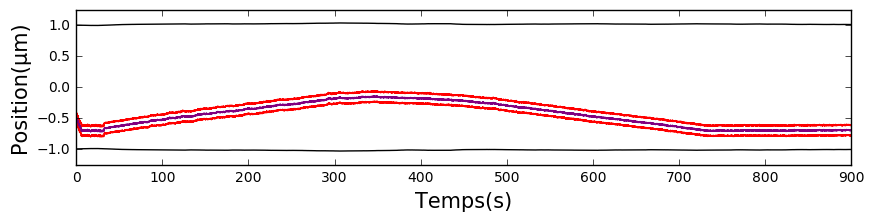

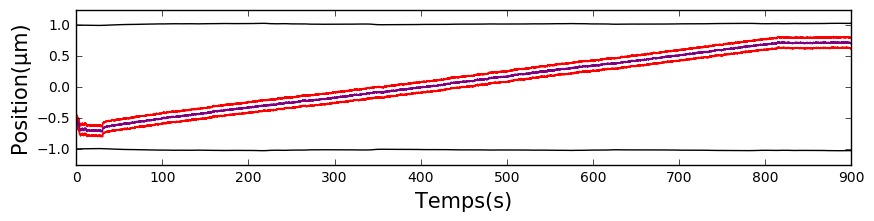

0800_1600_005_250_100_090


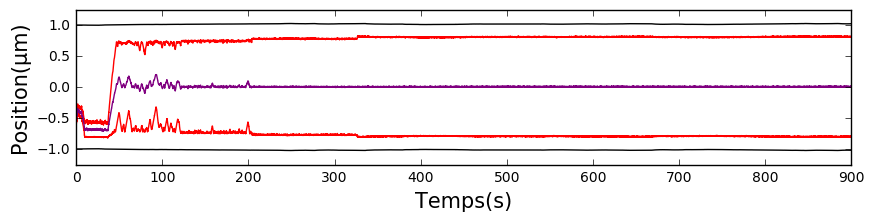

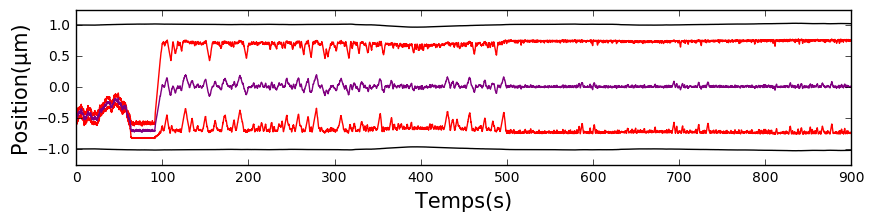

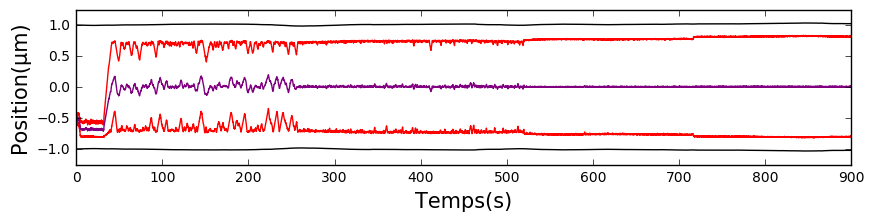

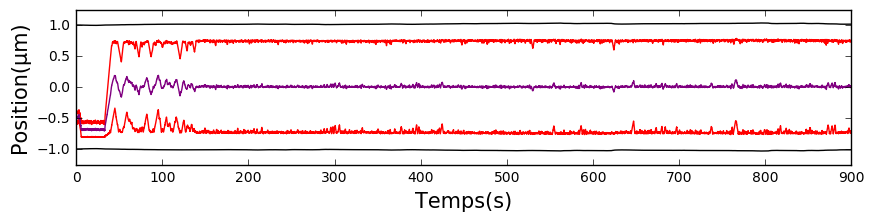

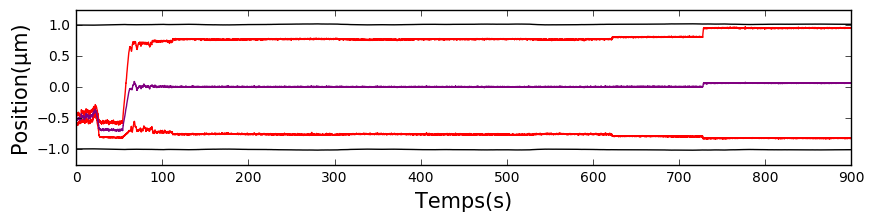

1600_0800_150_120_020_050


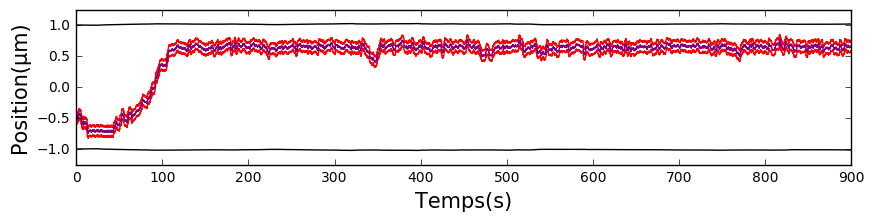

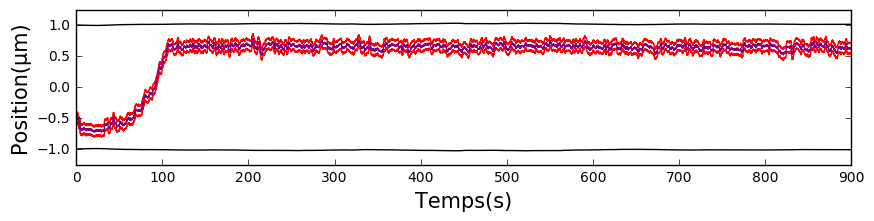

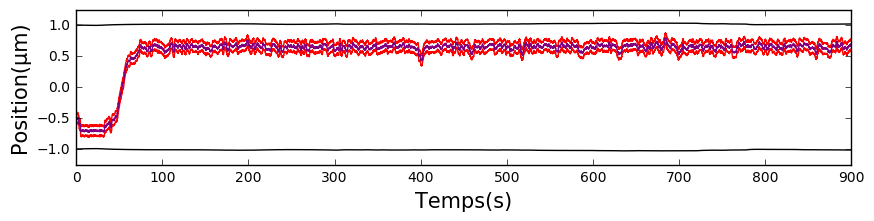

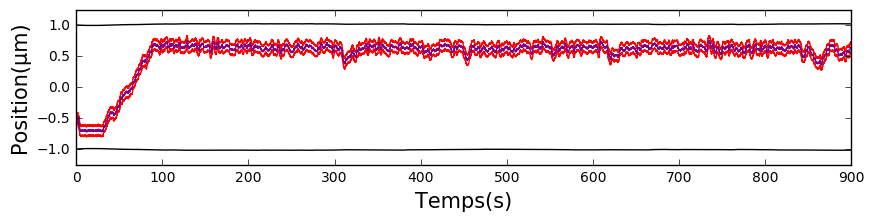

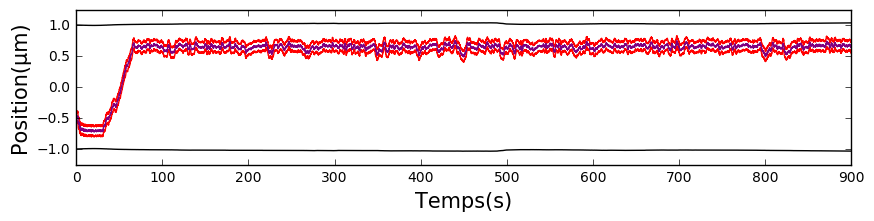

1600_1600_150_005_200_050


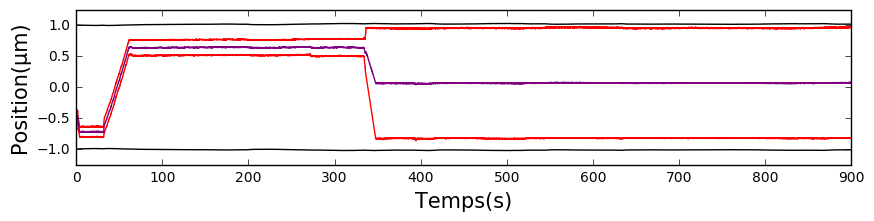

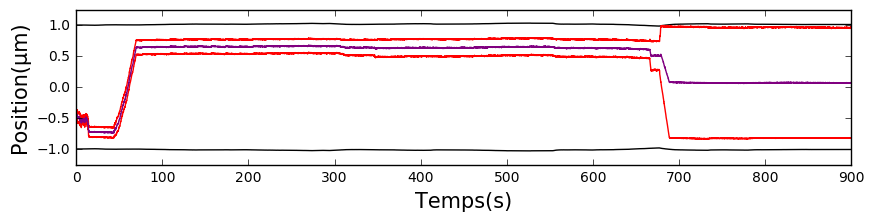

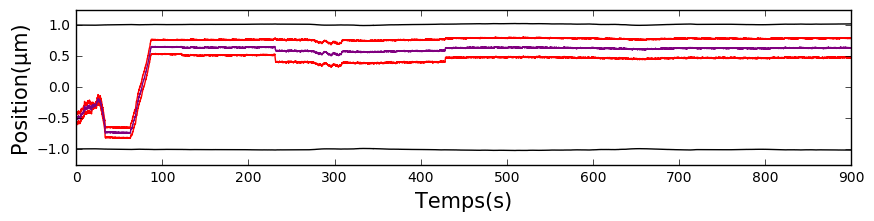

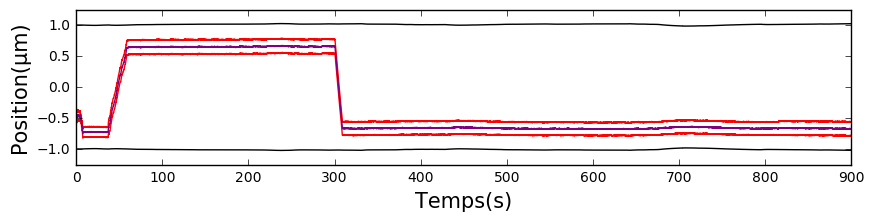

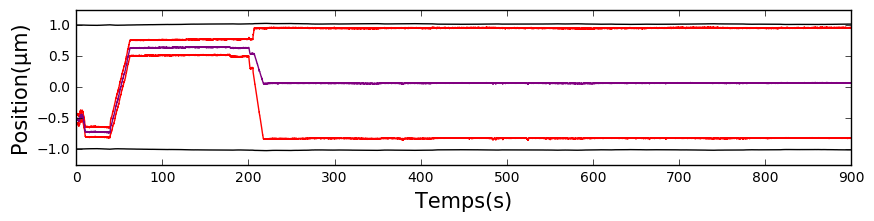

1600_0800_005_005_200_050


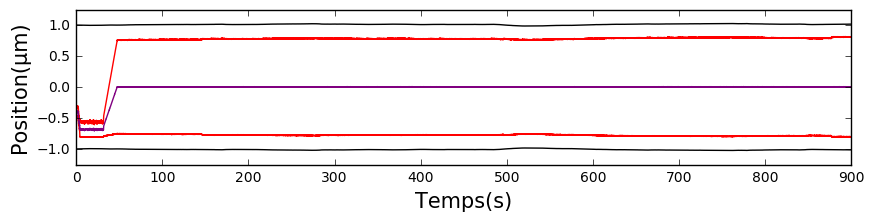

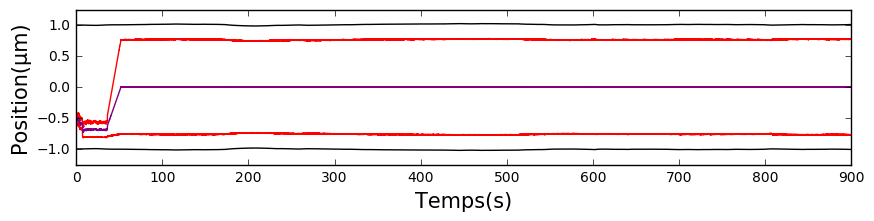

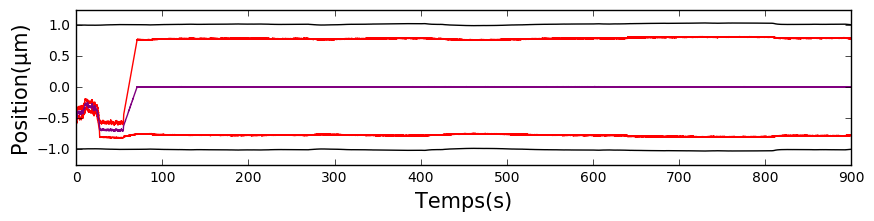

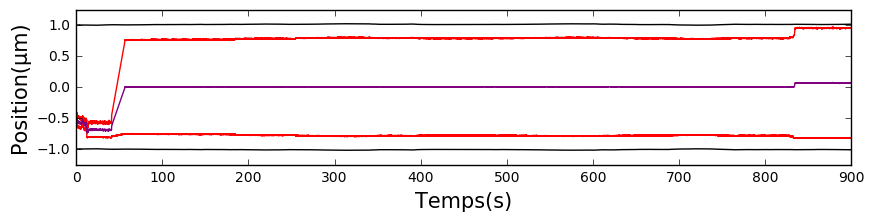

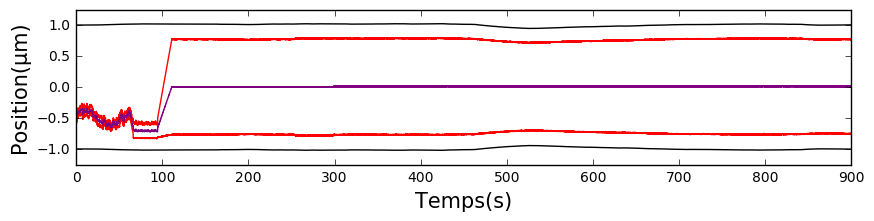

1600_1600_150_120_020_090


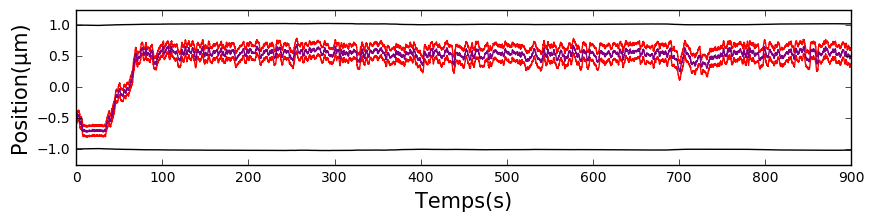

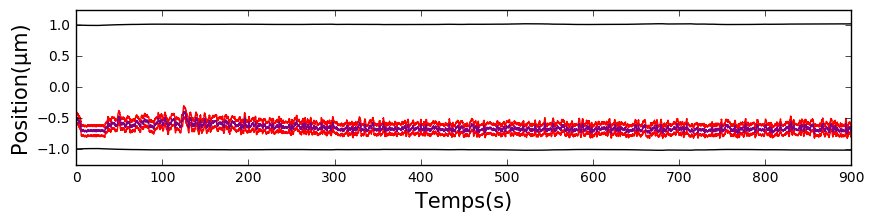

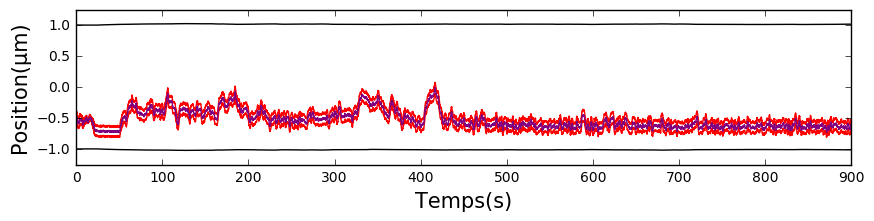

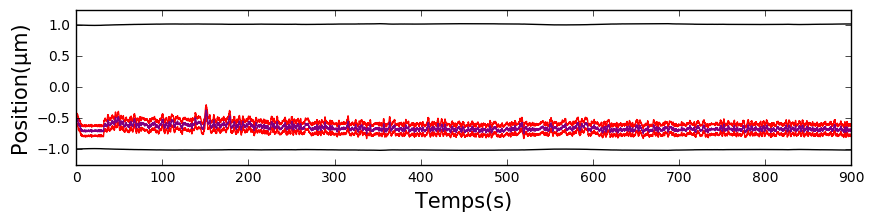

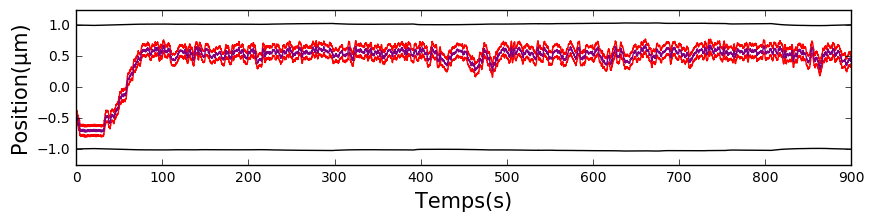

0800_0017_150_005_200_090


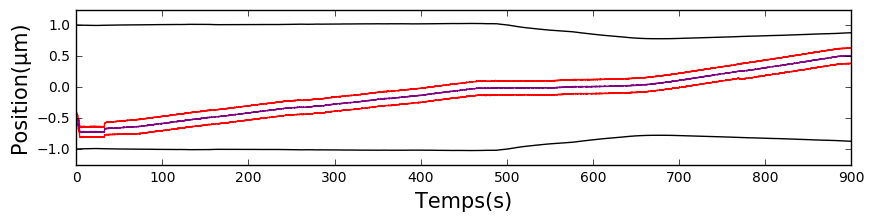

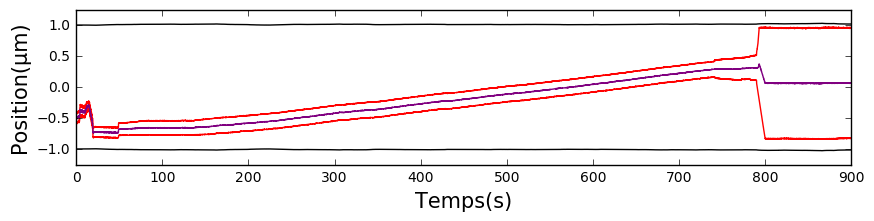

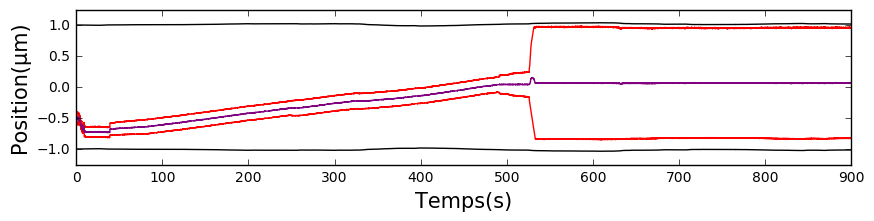

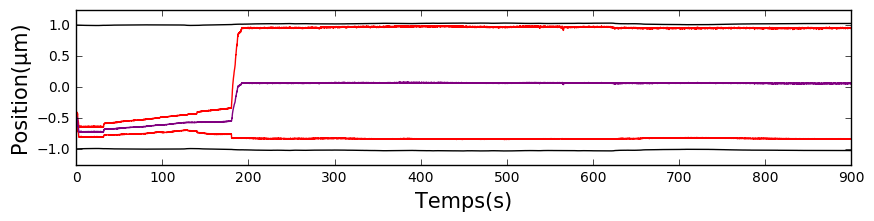

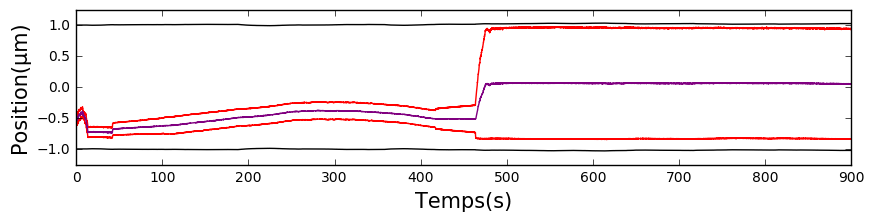

0800_0017_150_120_020_090


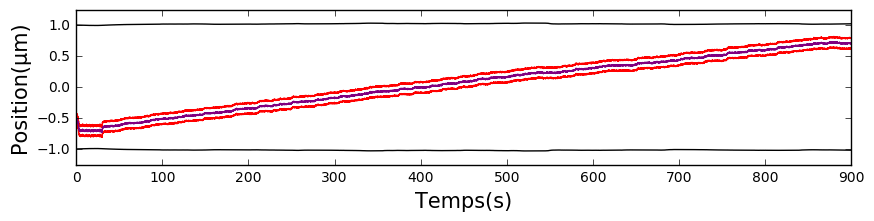

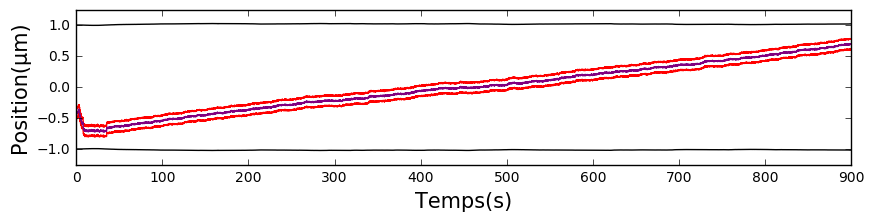

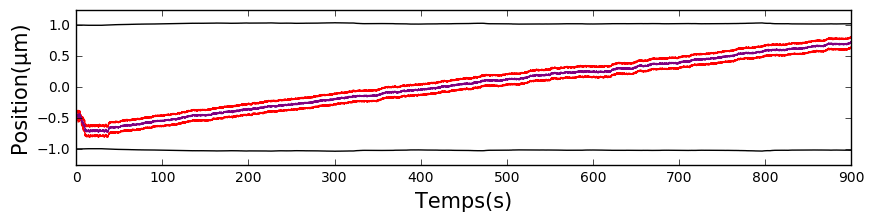

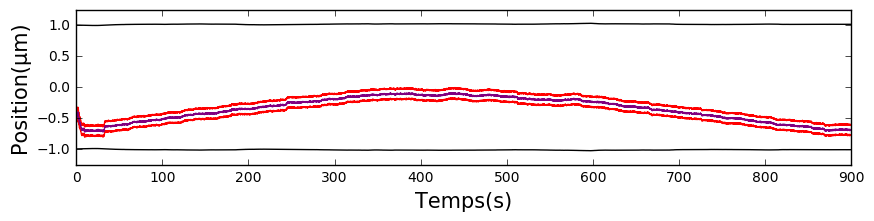

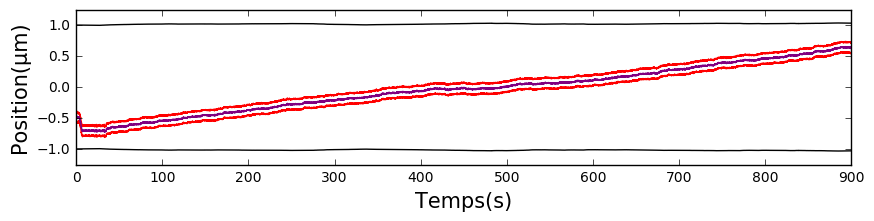

0800_0017_075_250_020_010


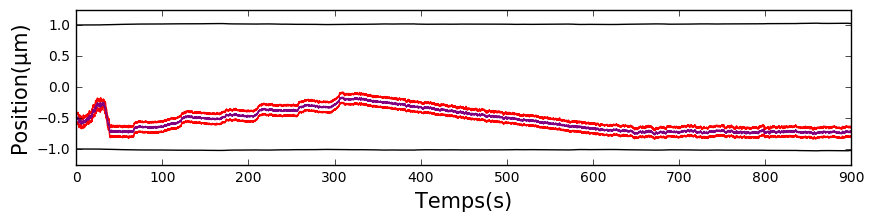

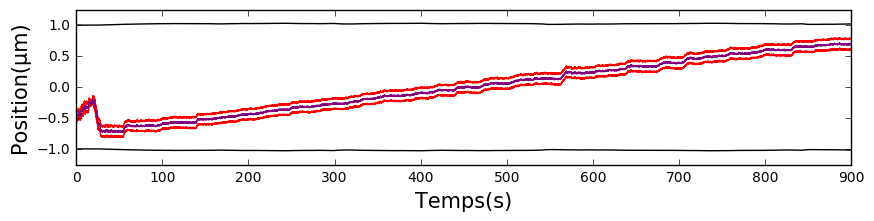

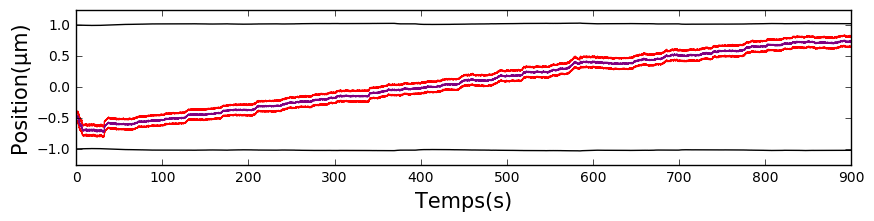

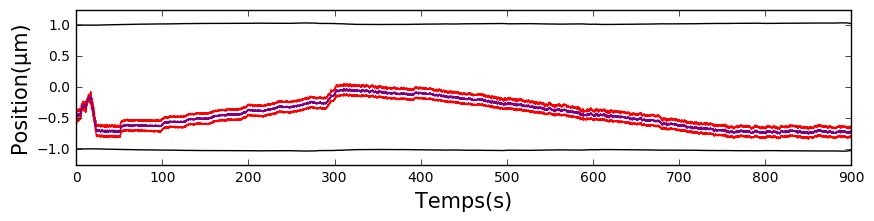

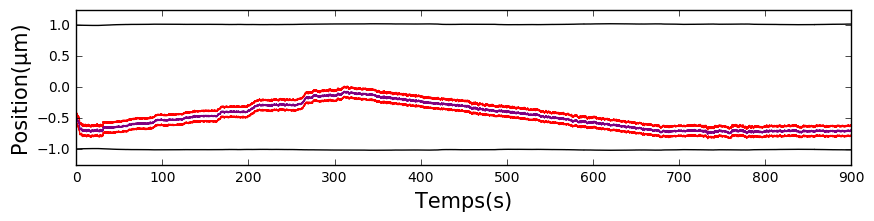

0800_0800_005_250_020_090


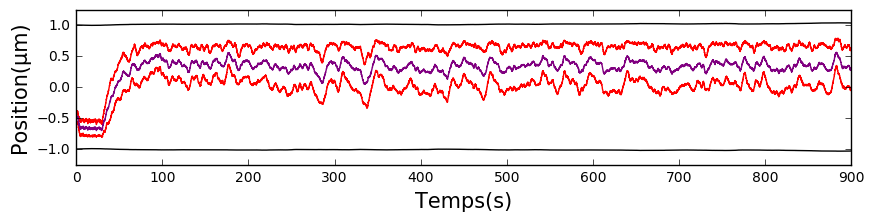

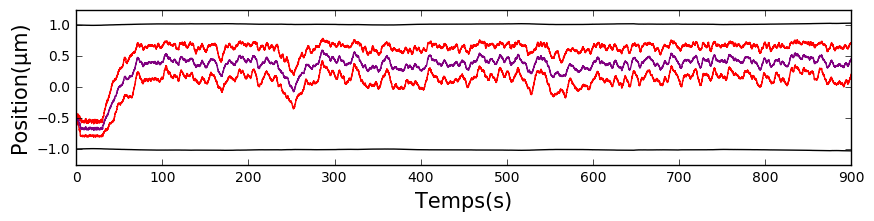

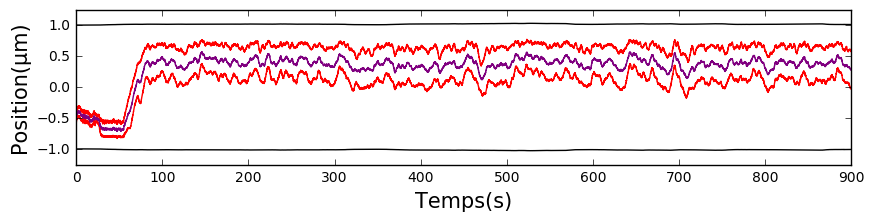

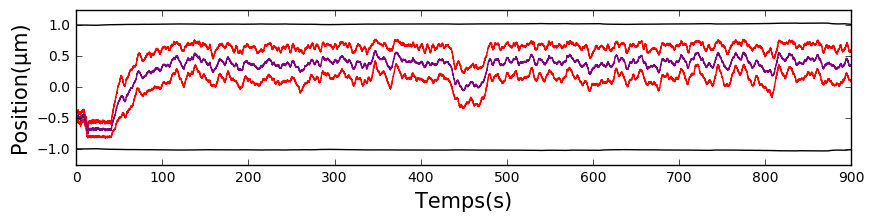

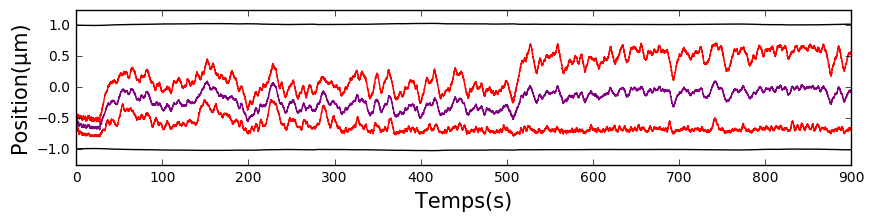

0017_1600_075_250_100_090


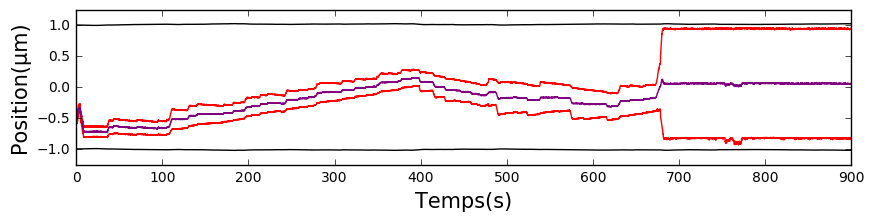

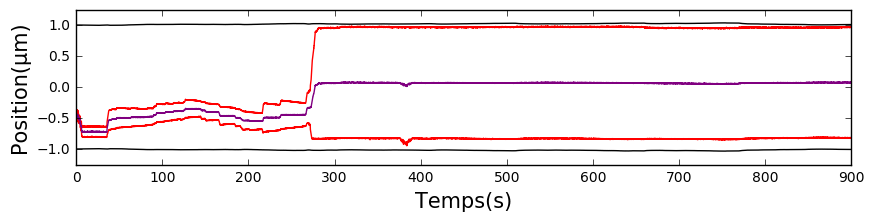

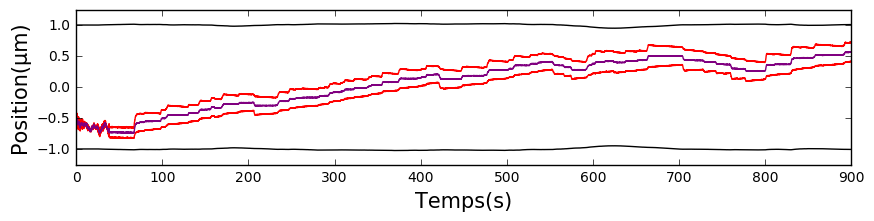

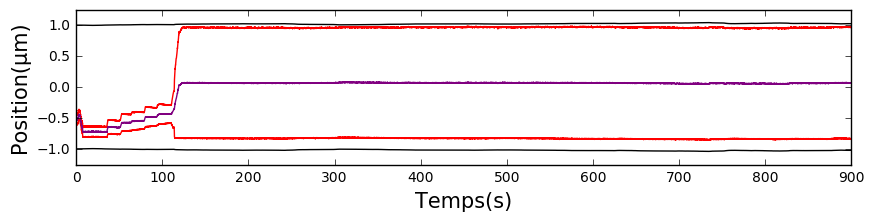

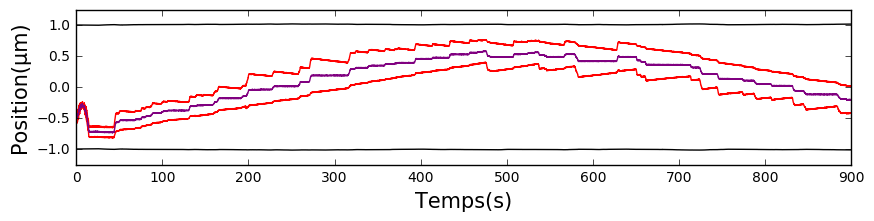

0017_0017_005_005_020_050


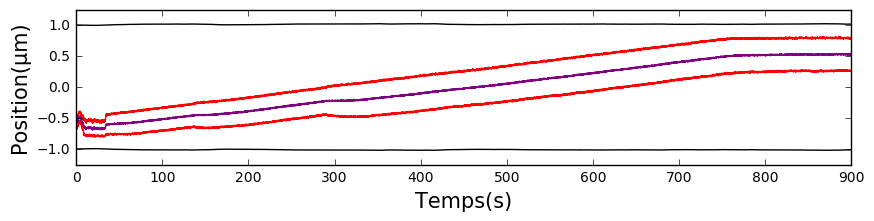

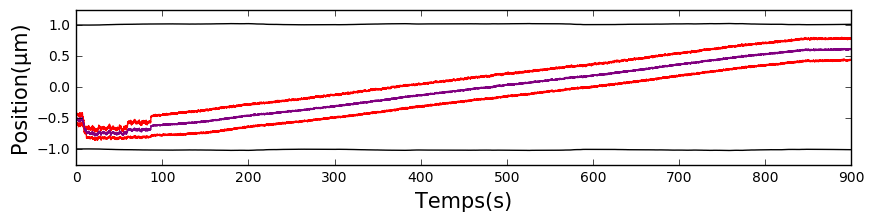

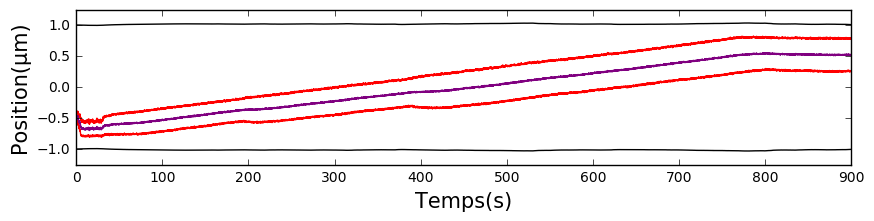

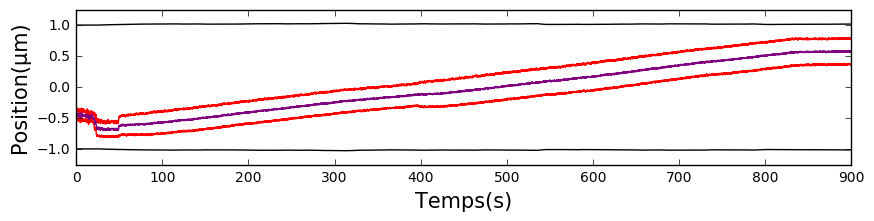

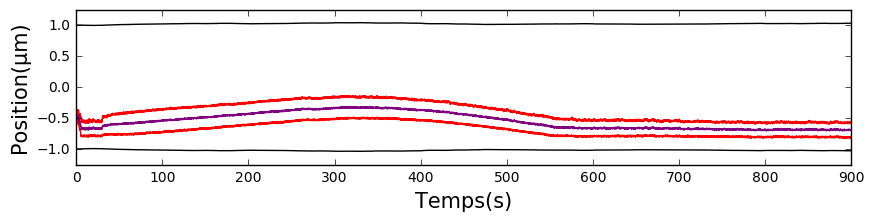

0017_0800_005_250_100_050


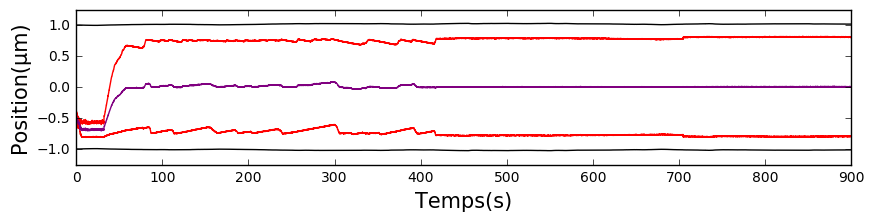

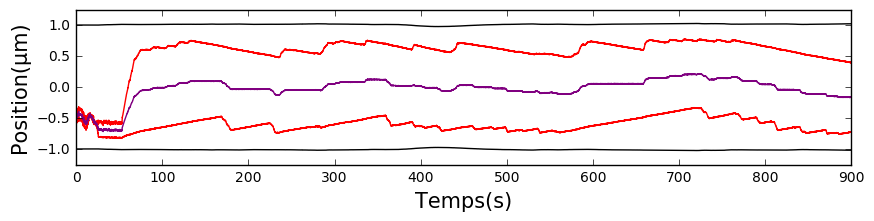

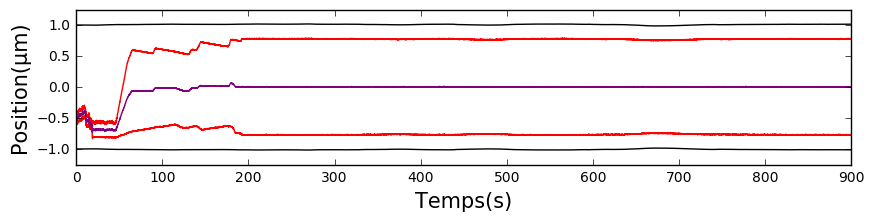

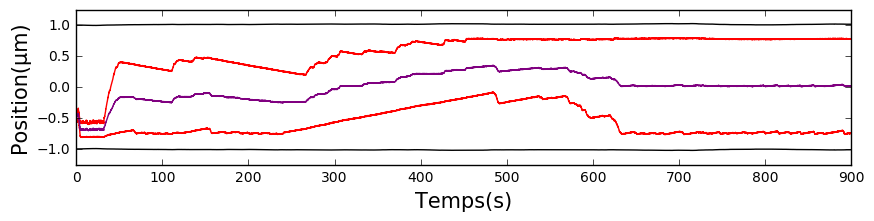

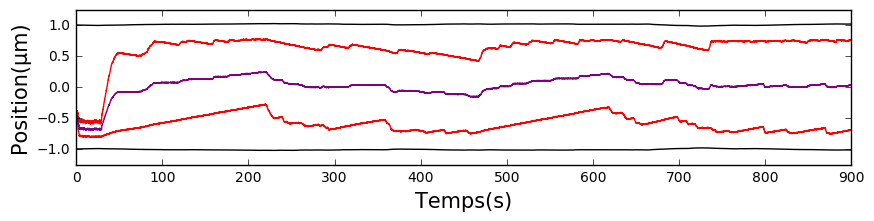

0800_1600_005_120_200_050


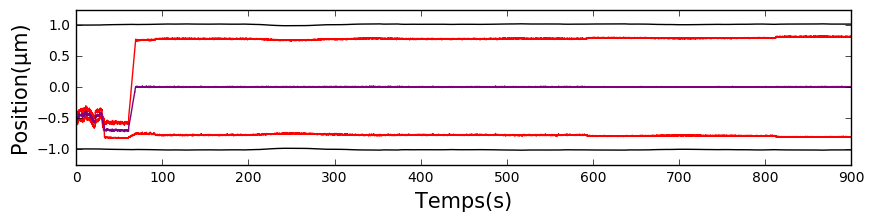

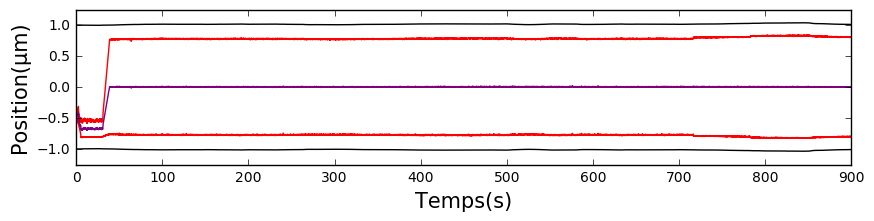

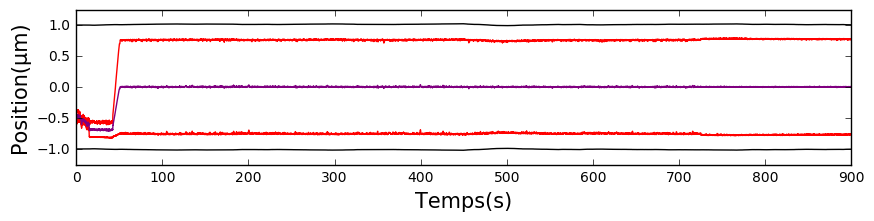

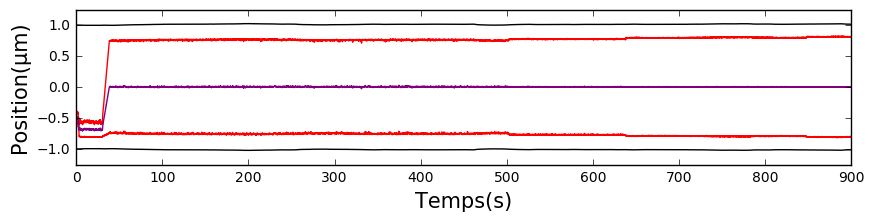

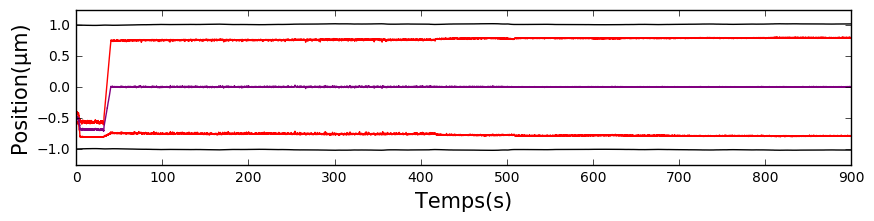

1600_1600_005_005_020_050


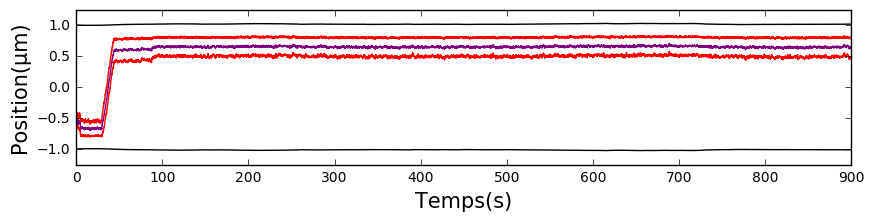

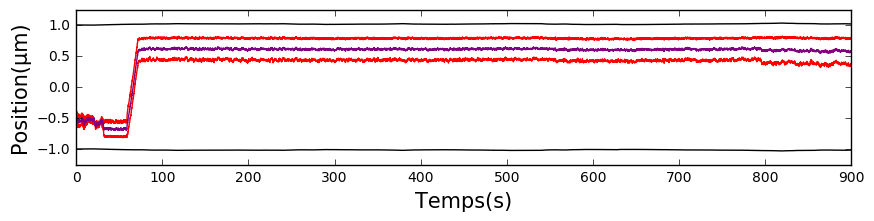

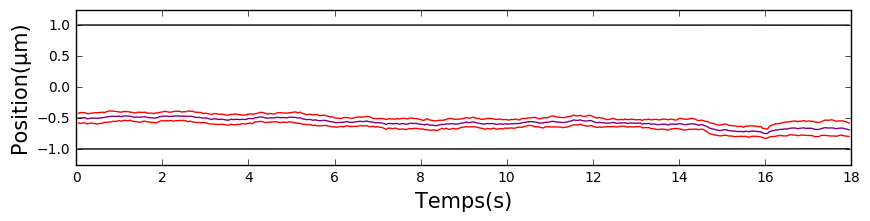

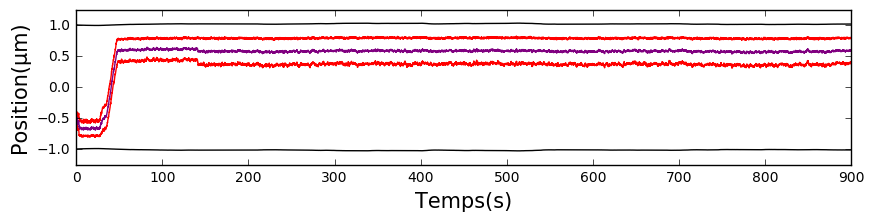

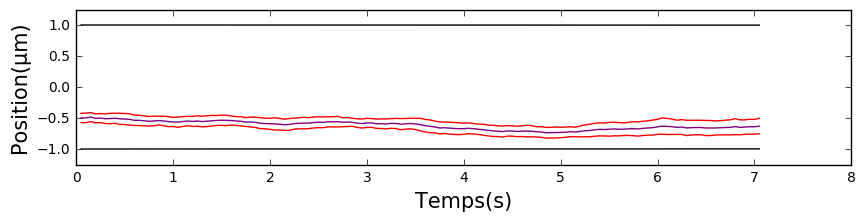

0017_0800_150_250_200_090


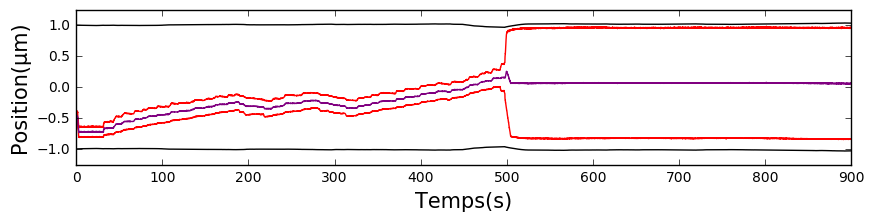

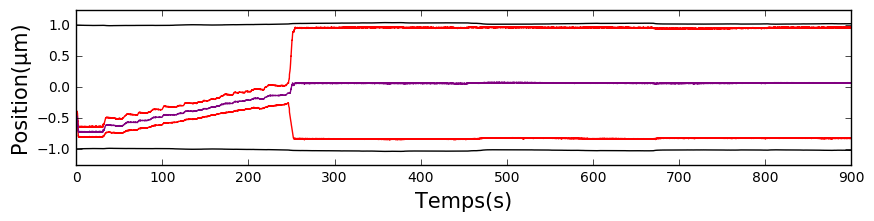

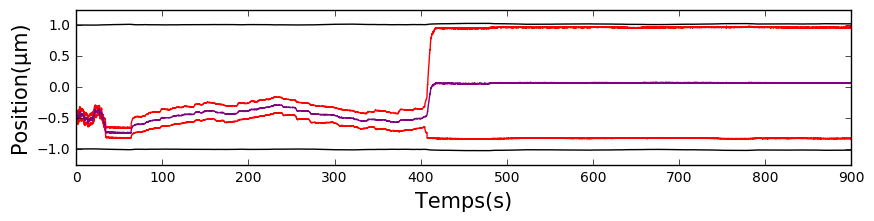

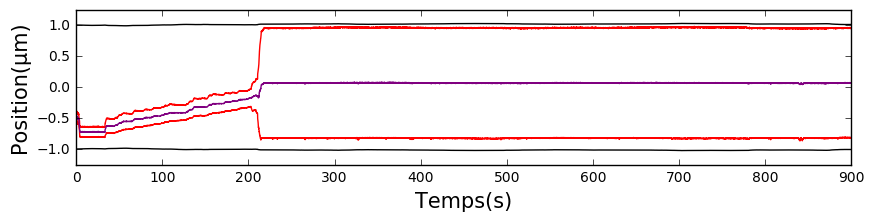

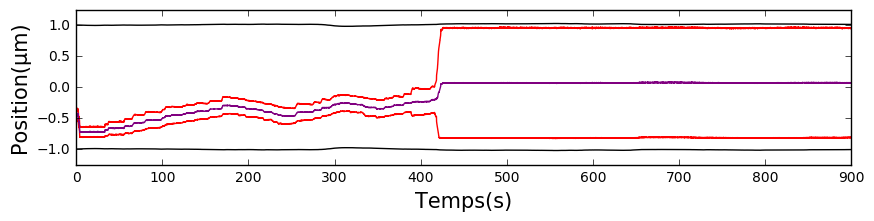

1600_1600_150_005_020_050


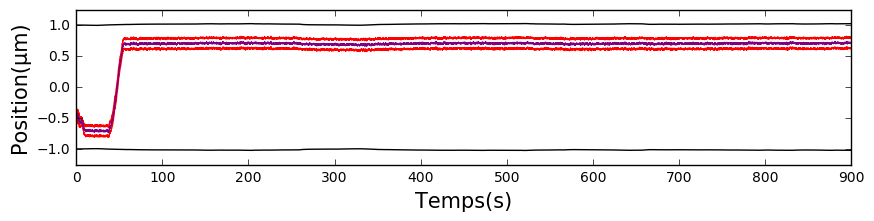

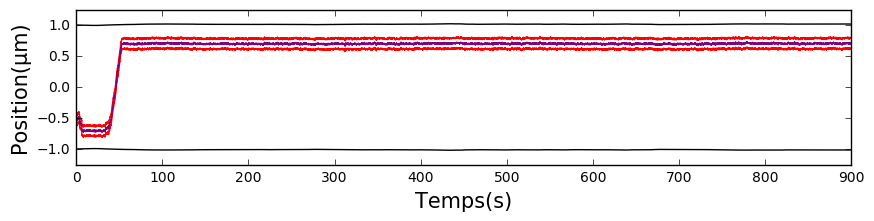

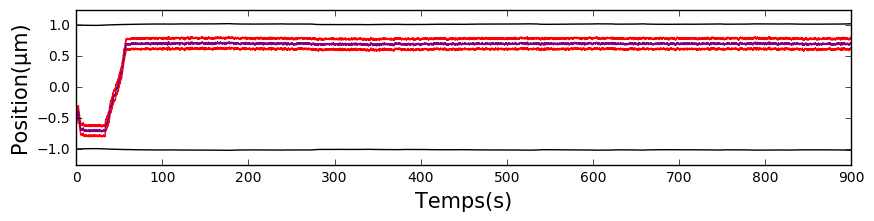

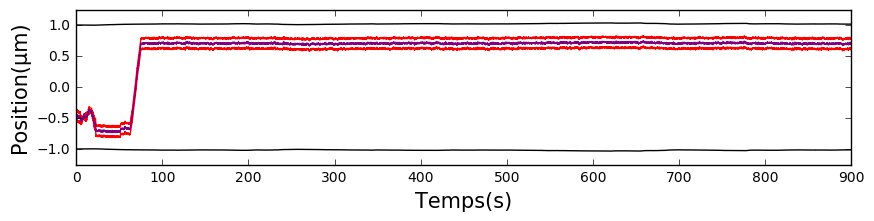

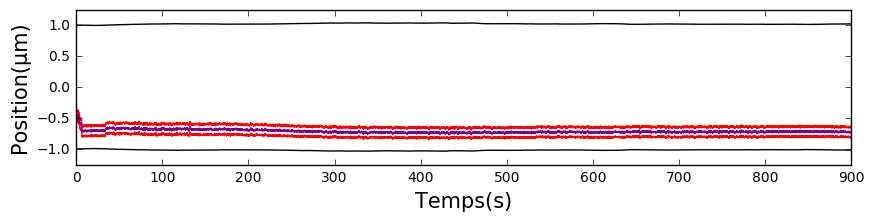

0800_0800_075_120_100_010


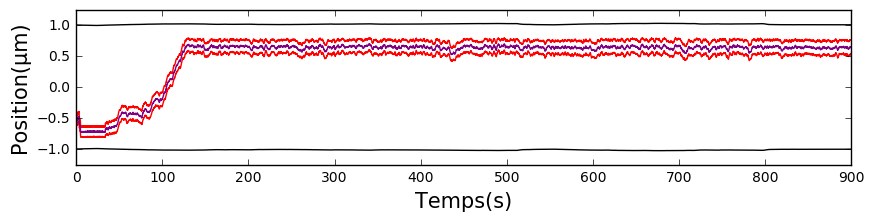

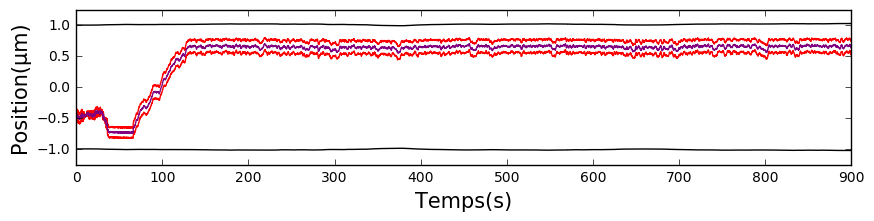

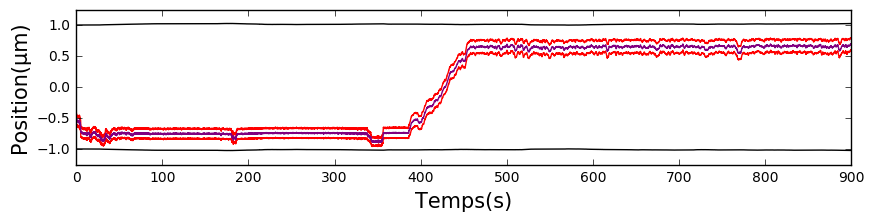

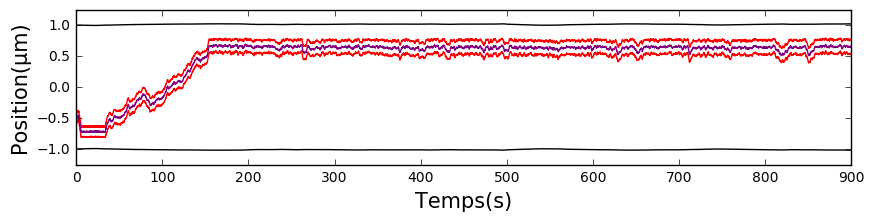

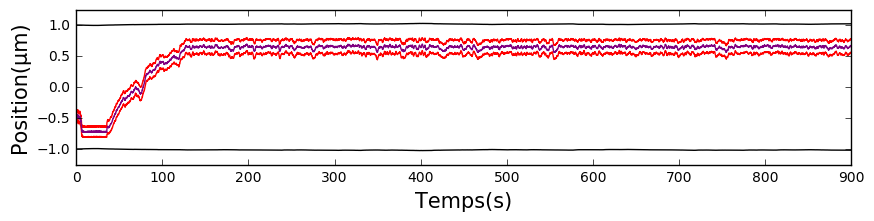

1600_0800_150_250_100_050


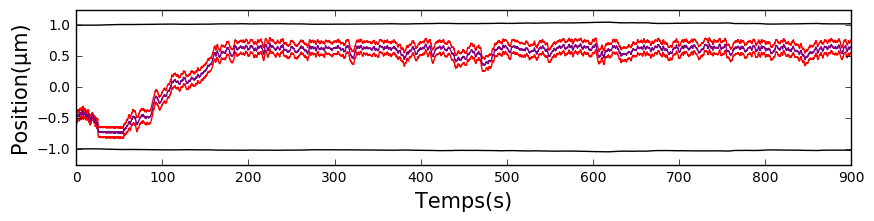

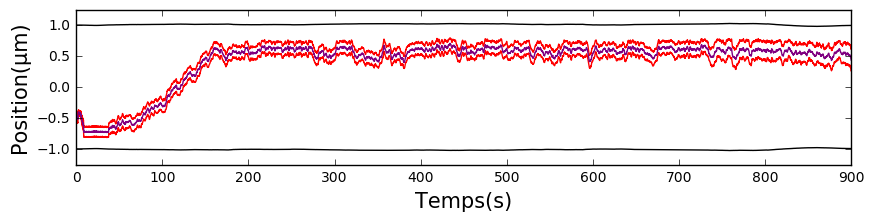

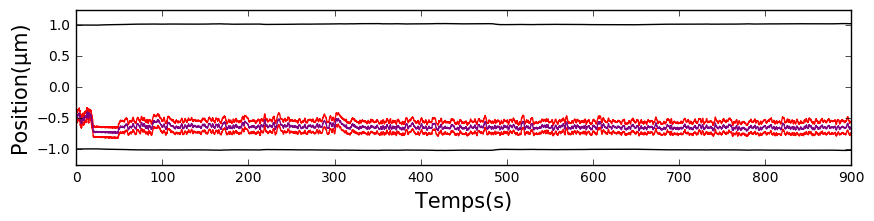

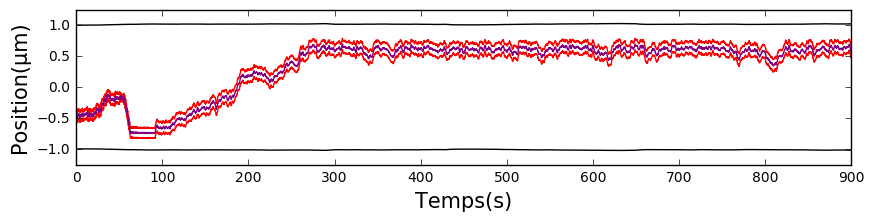

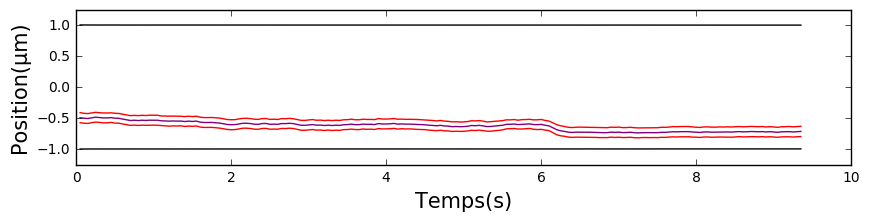

1600_1600_005_005_020_090


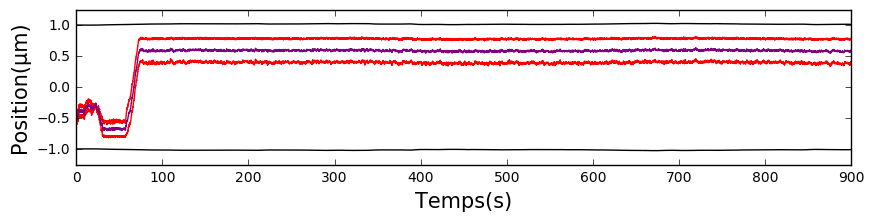

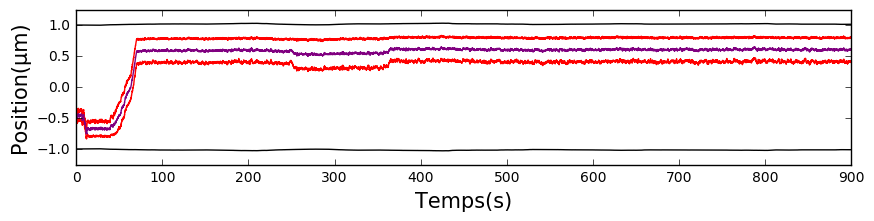

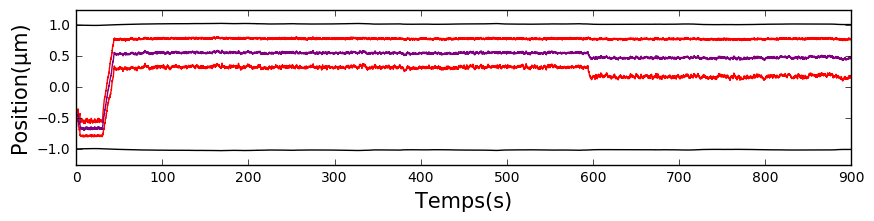

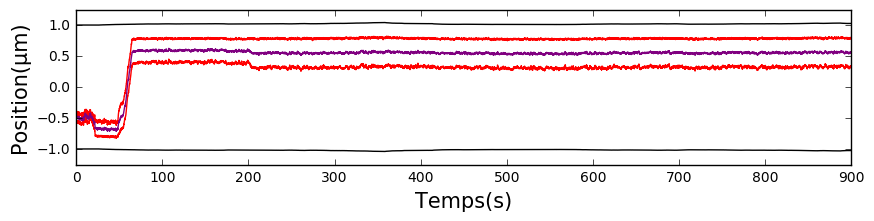

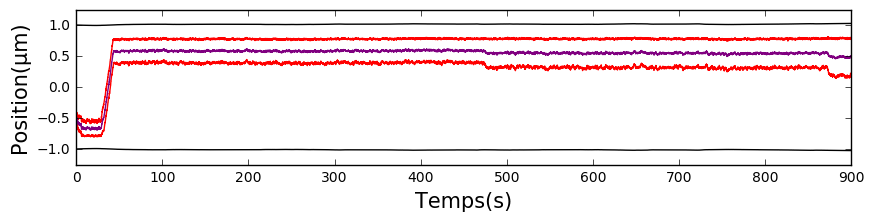

1600_1600_005_250_200_010


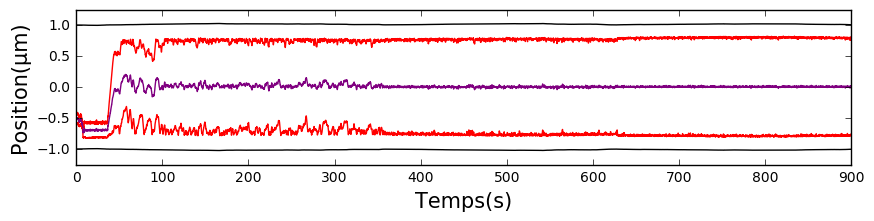

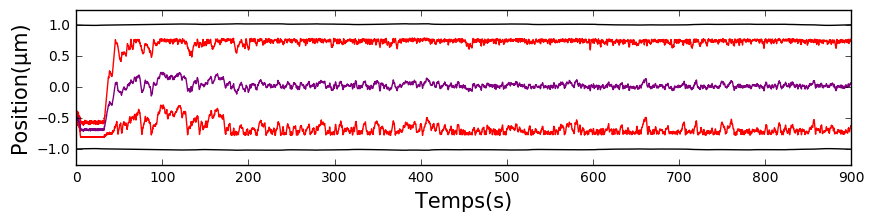

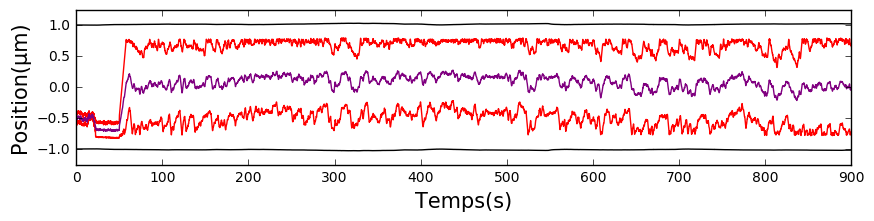

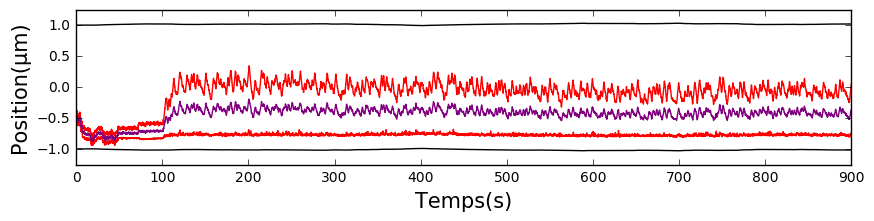

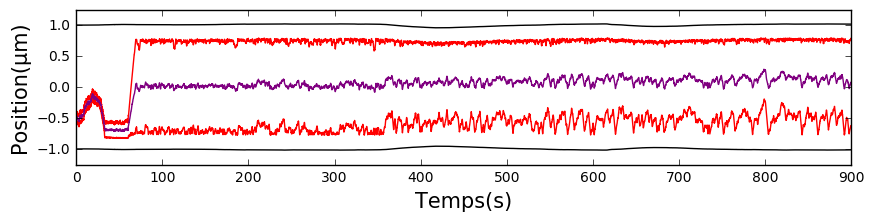

0017_0800_075_120_200_090


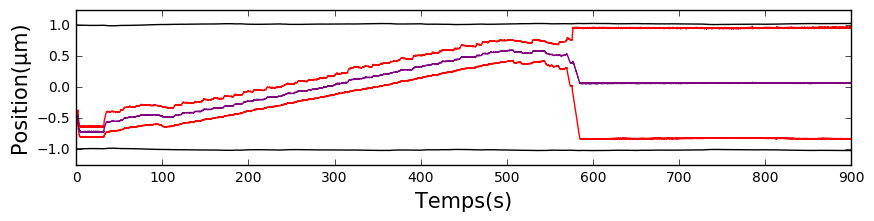

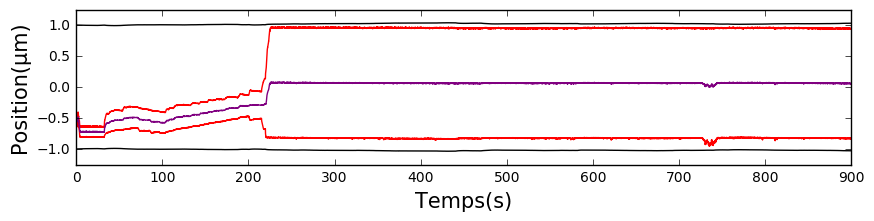

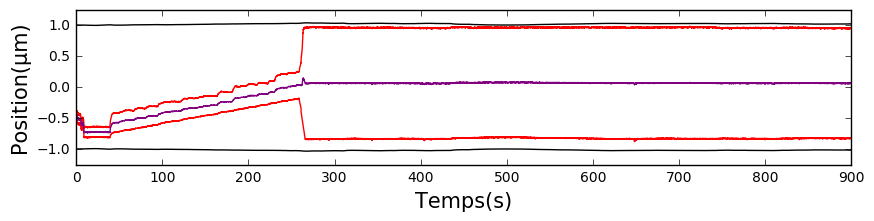

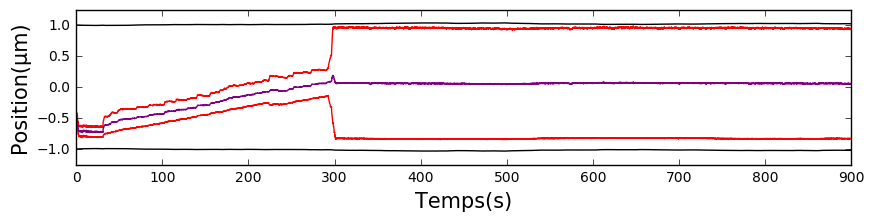

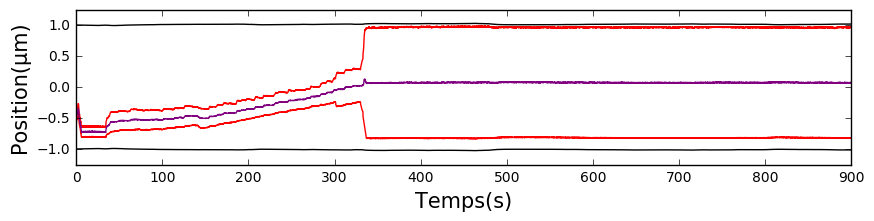

0017_1600_150_120_020_050


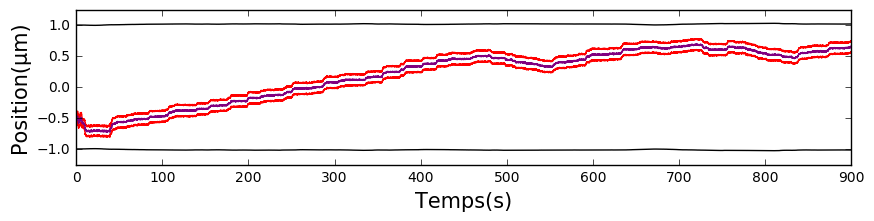

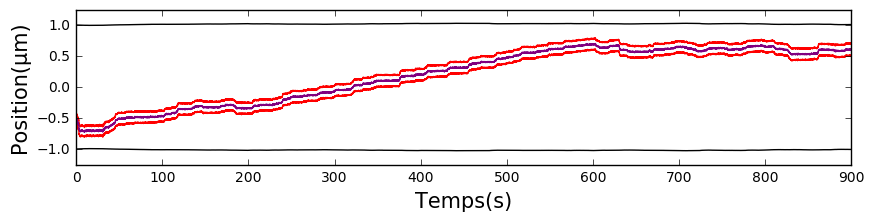

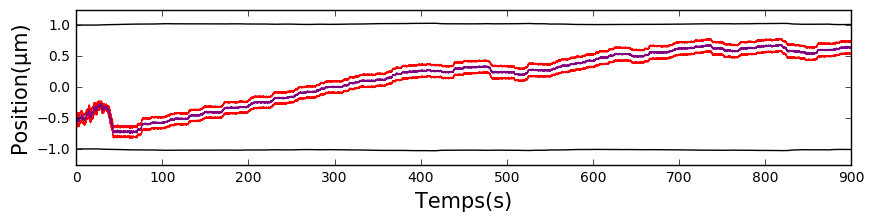

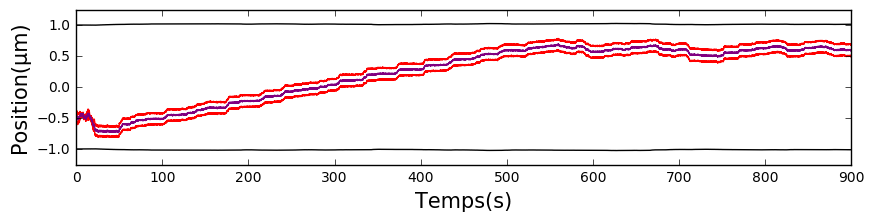

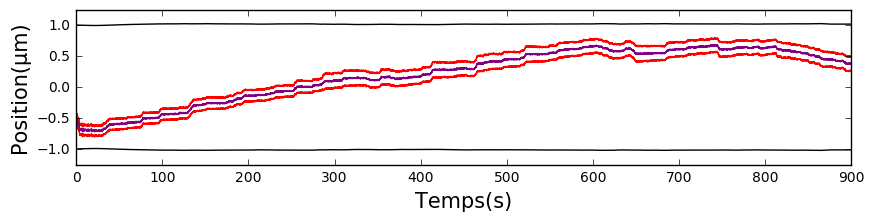

0017_0017_075_250_100_010


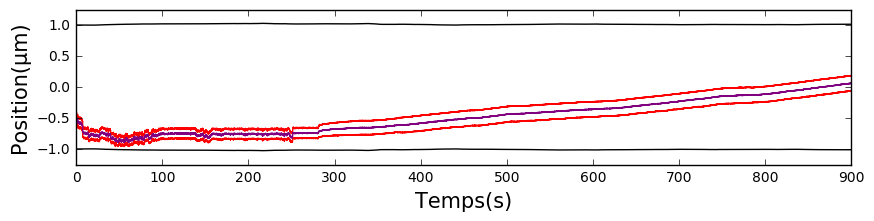

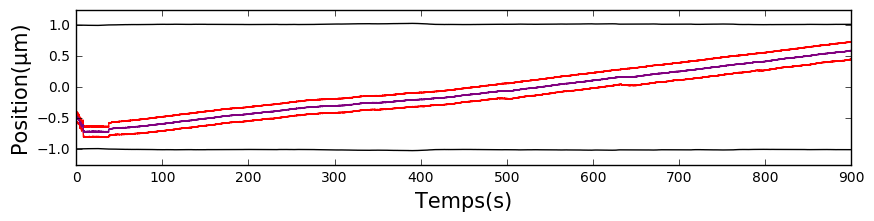

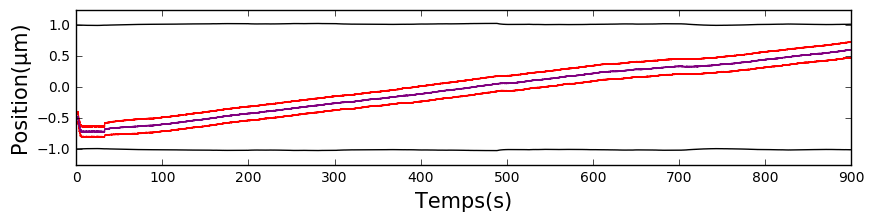

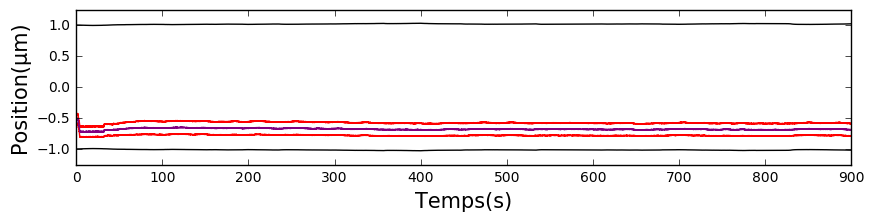

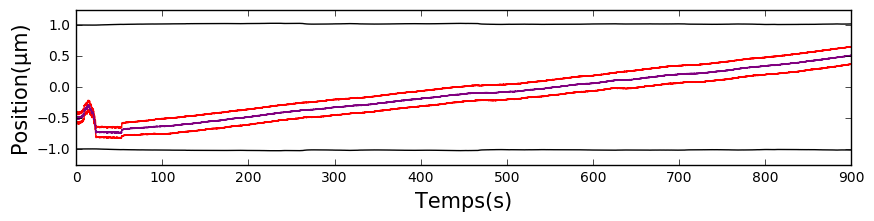

0017_1600_005_250_200_010


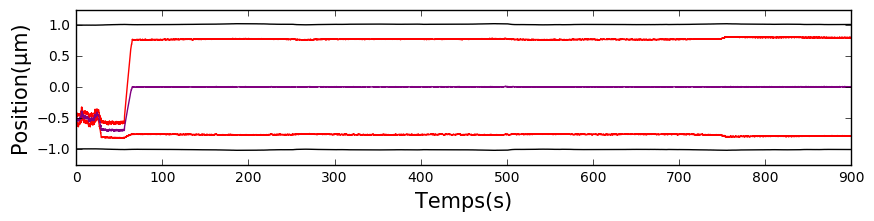

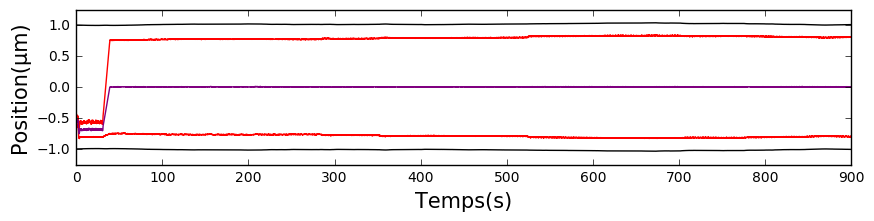

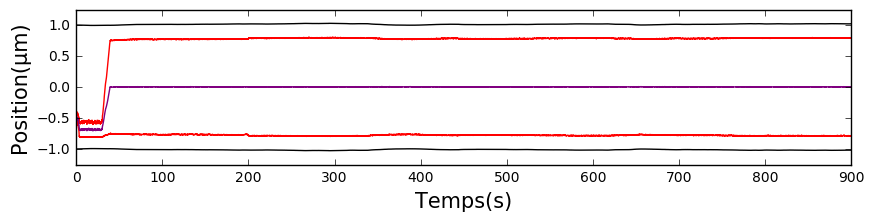

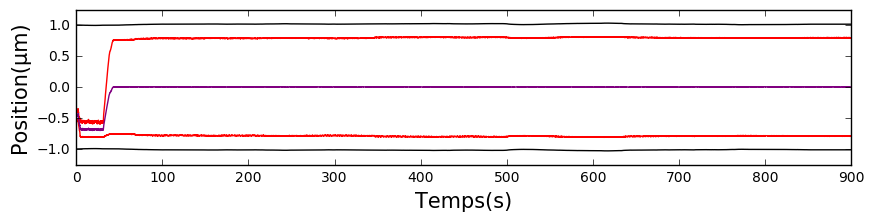

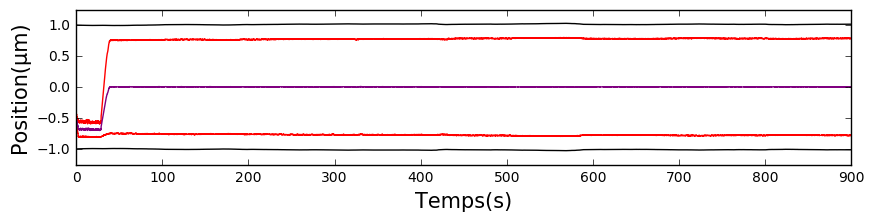

1600_1600_005_250_200_050


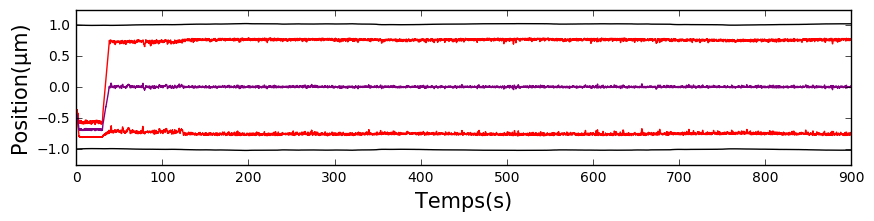

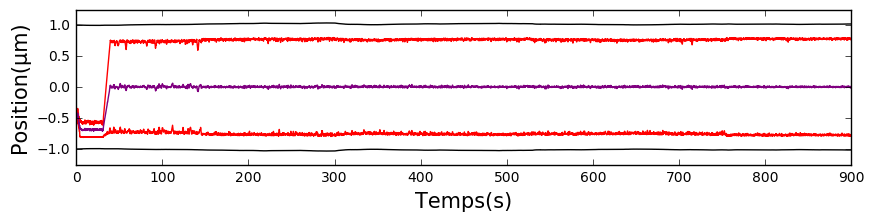

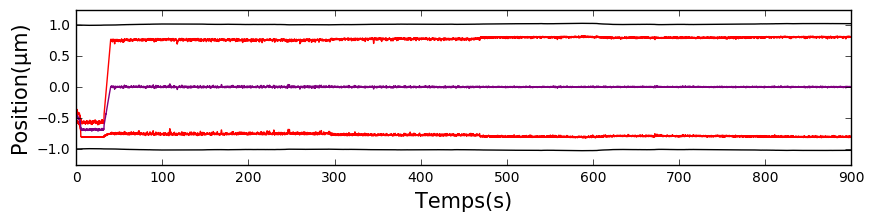

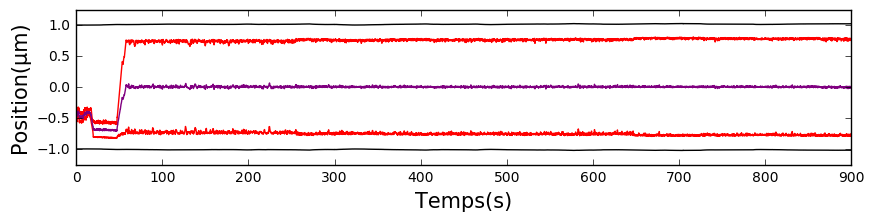

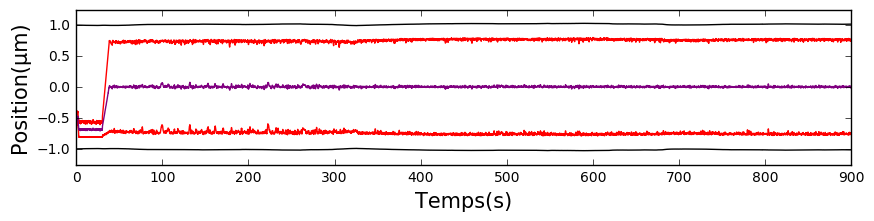

0017_0017_005_250_100_010


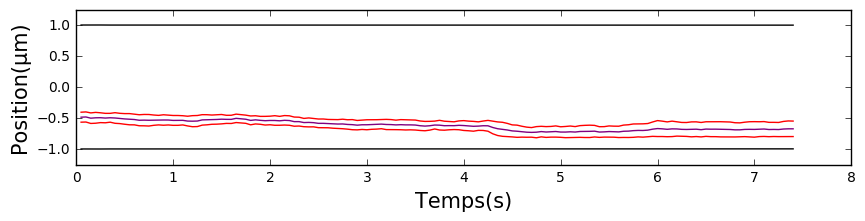

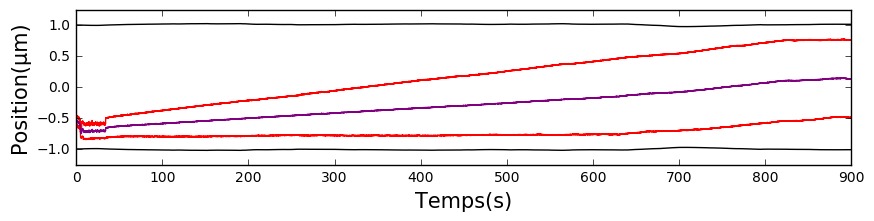

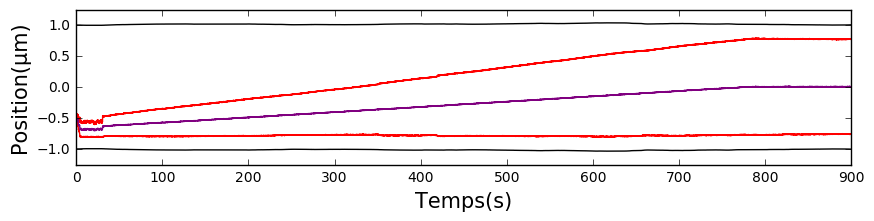

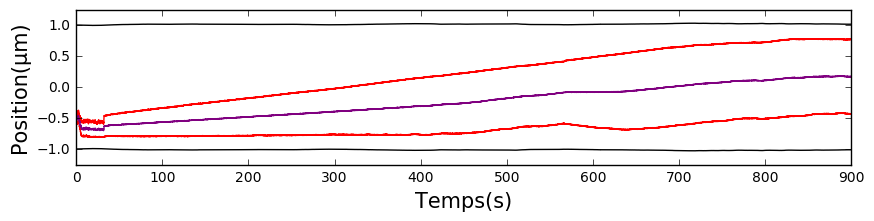

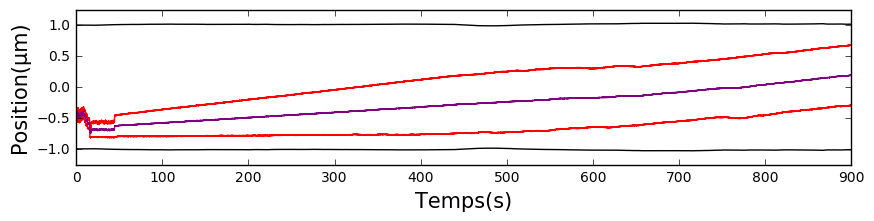

1600_0800_075_120_200_090


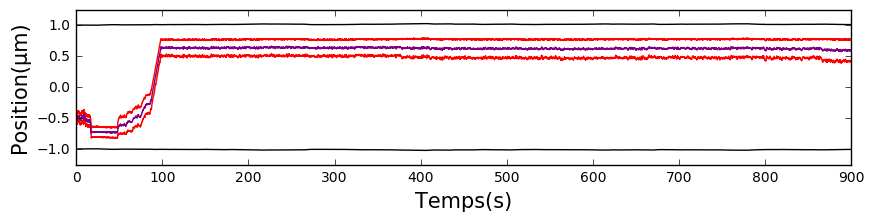

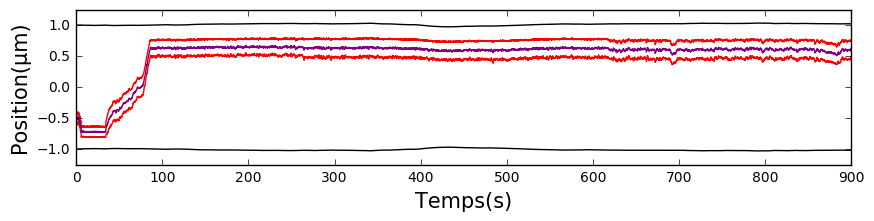

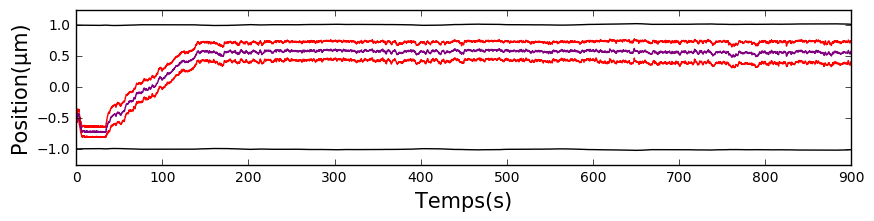

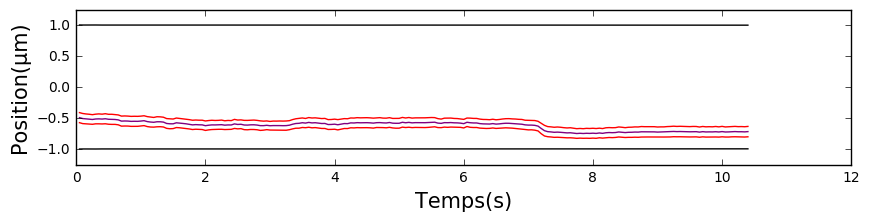

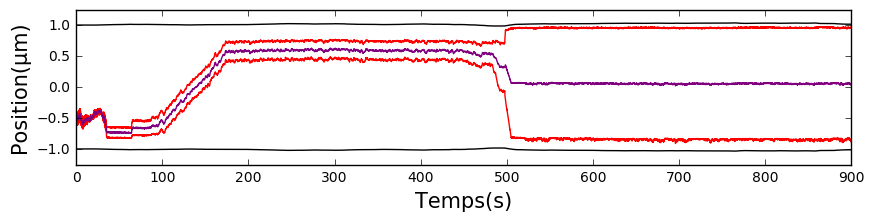

1600_0800_005_005_020_010


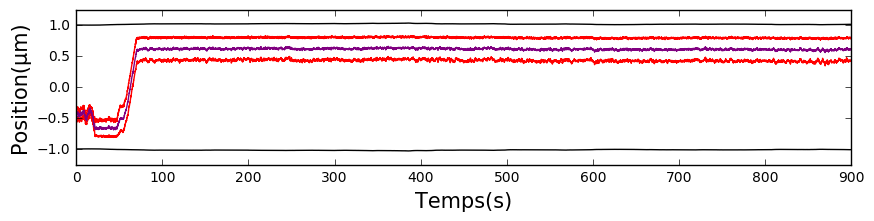

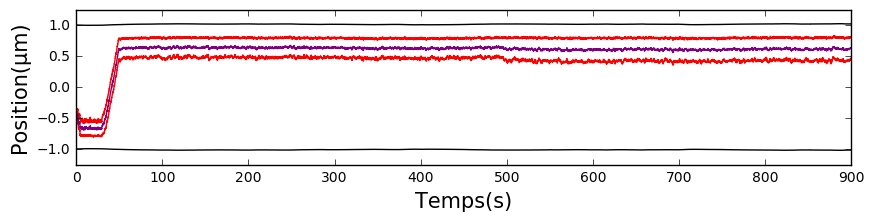

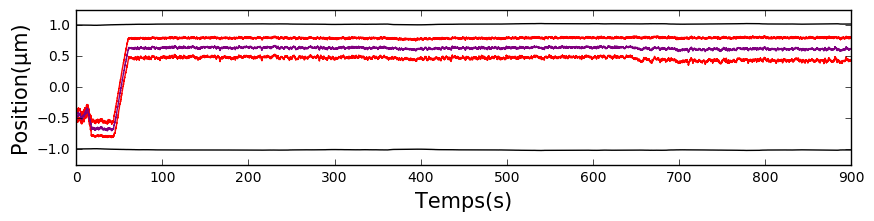

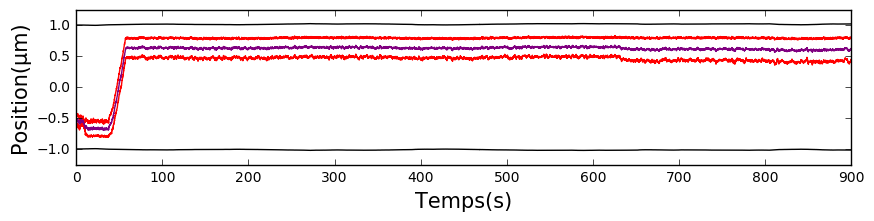

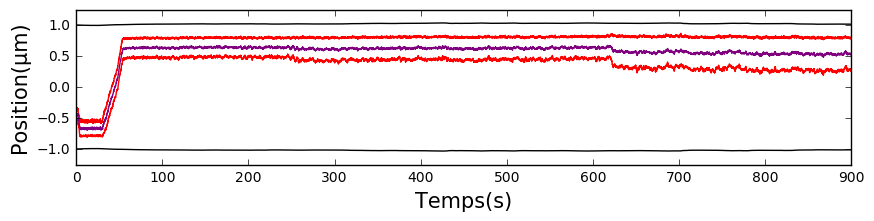

1600_0017_075_005_200_050


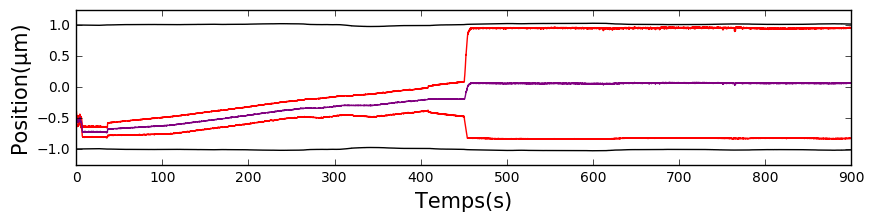

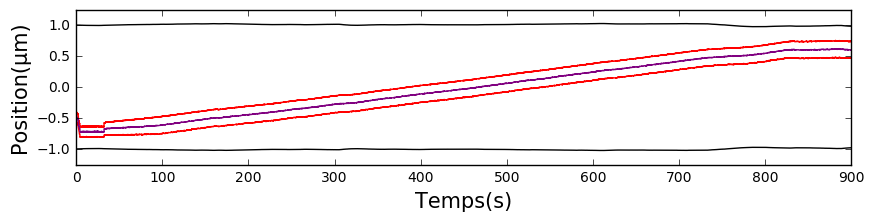

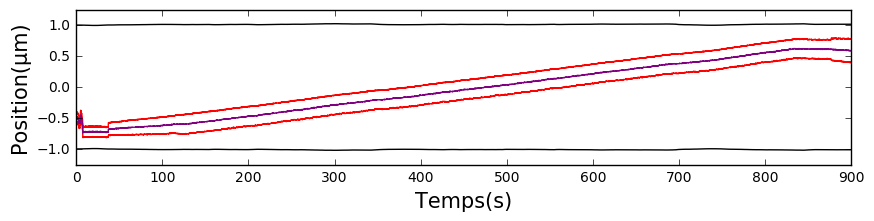

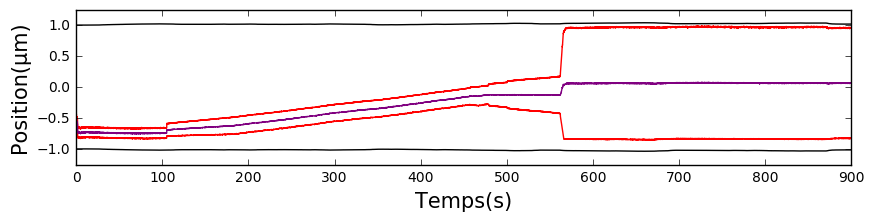

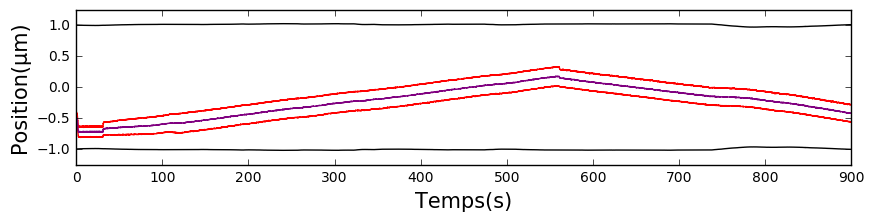

0017_0017_150_005_020_090


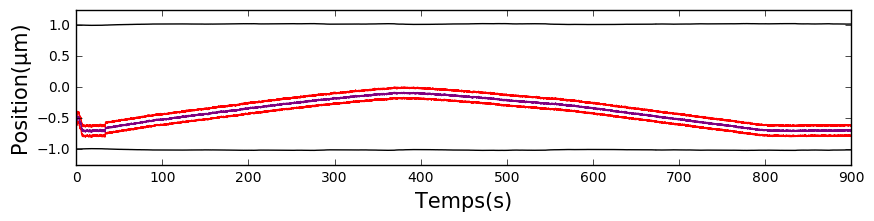

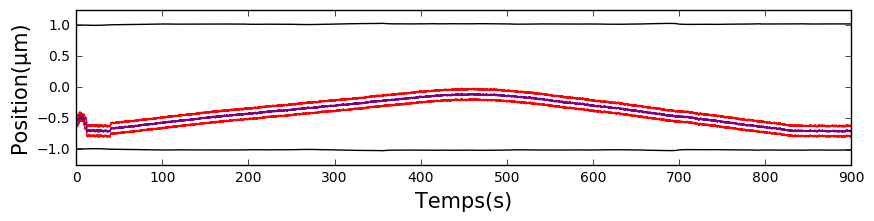

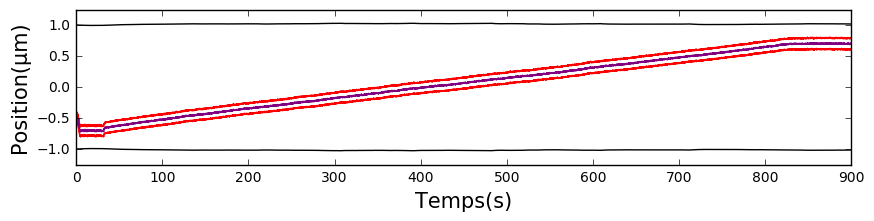

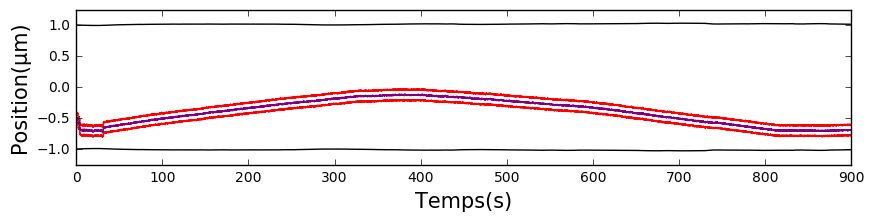

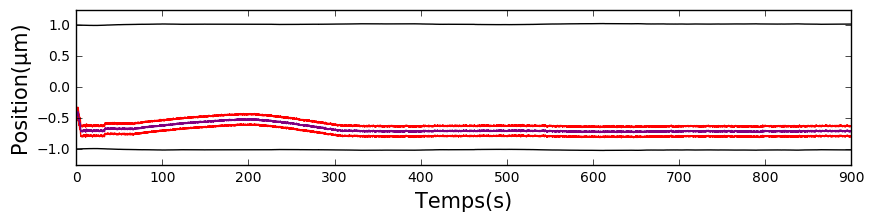

1600_1600_005_005_100_010


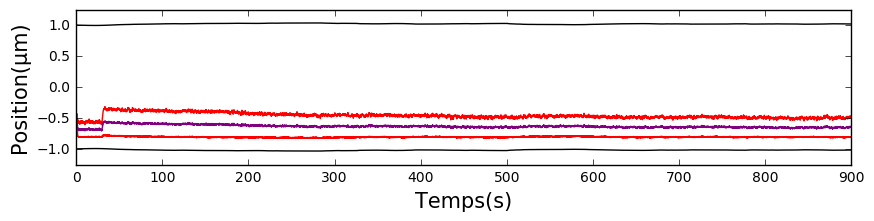

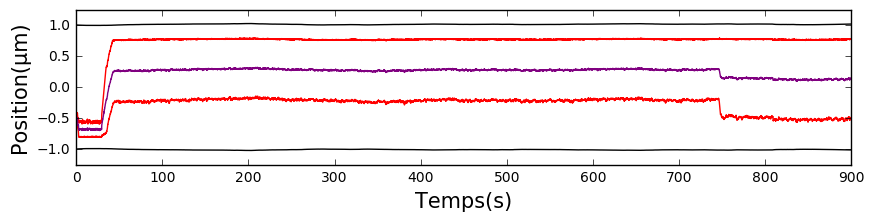

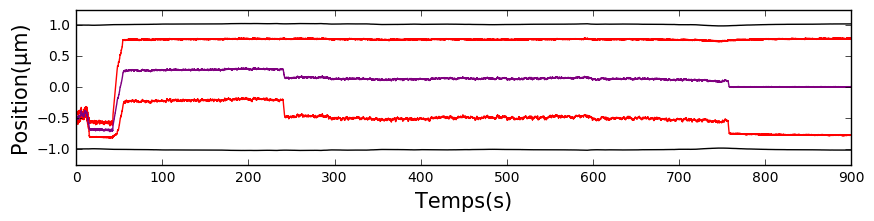

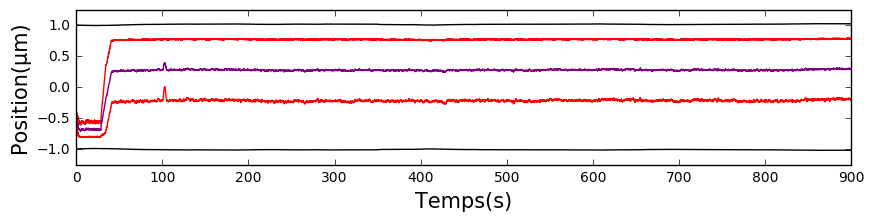

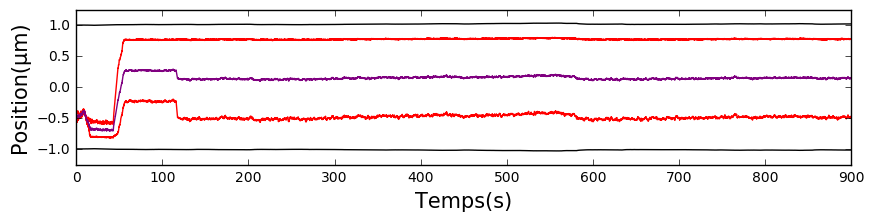

1600_0800_150_005_020_090


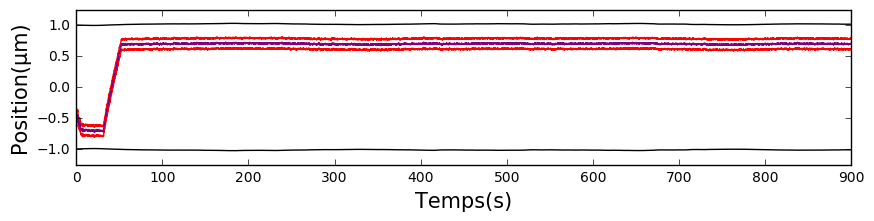

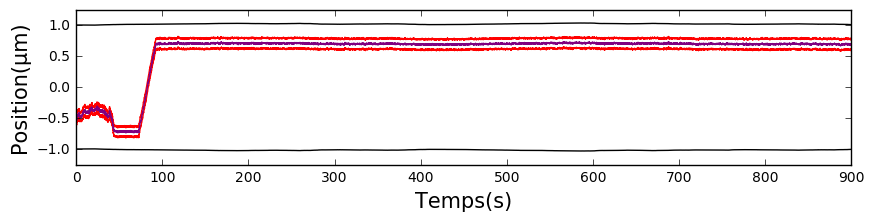

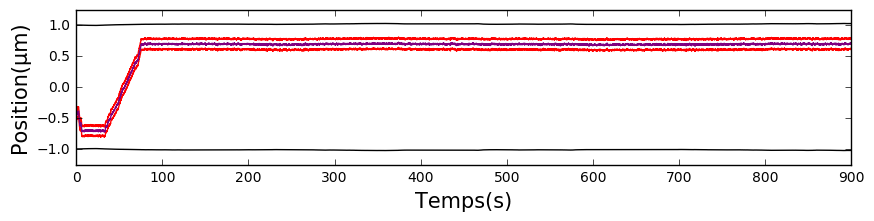

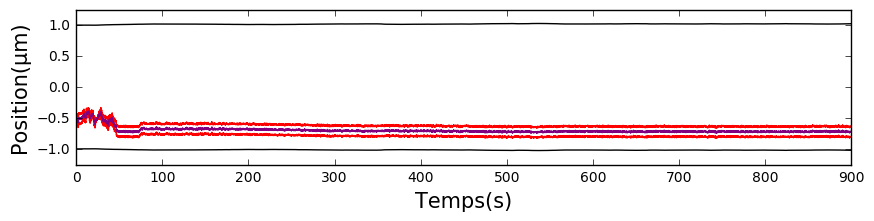

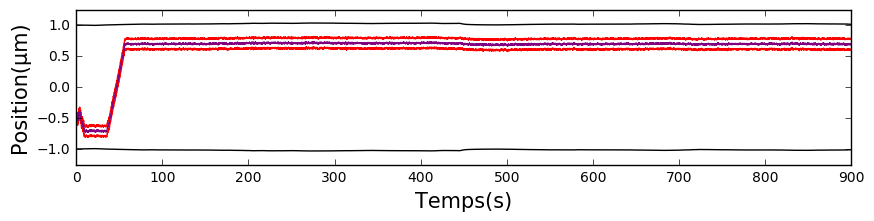

1600_0017_005_250_100_010


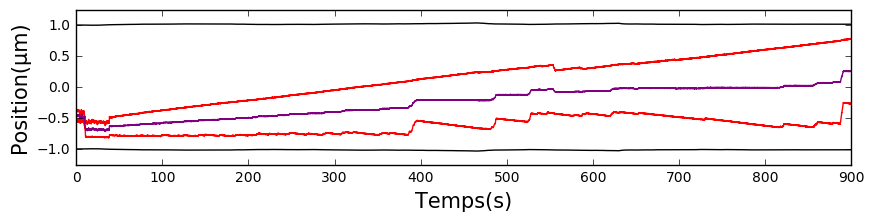

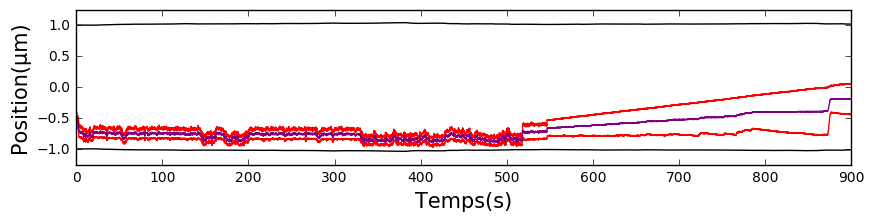

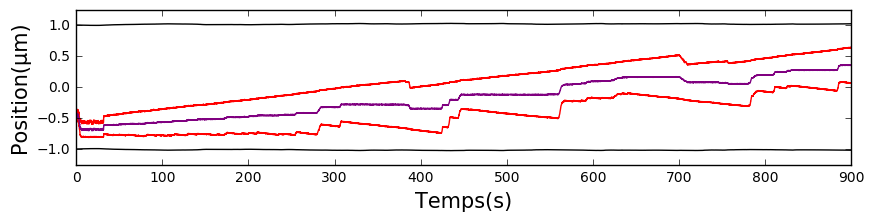

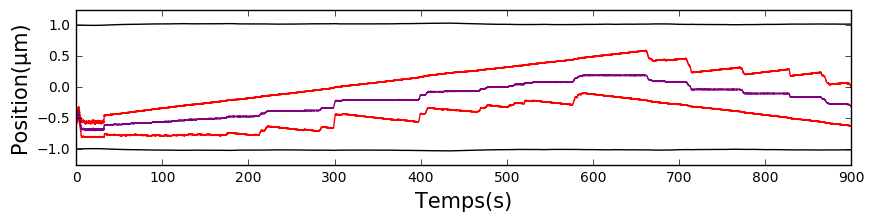

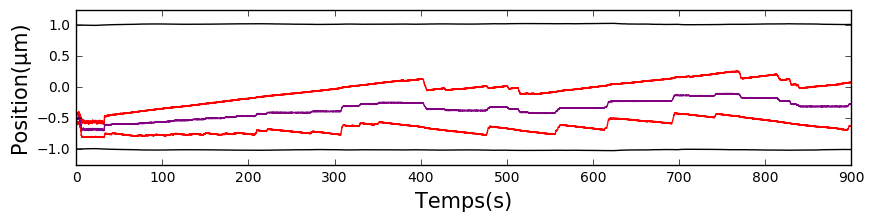

0017_0017_075_250_100_050


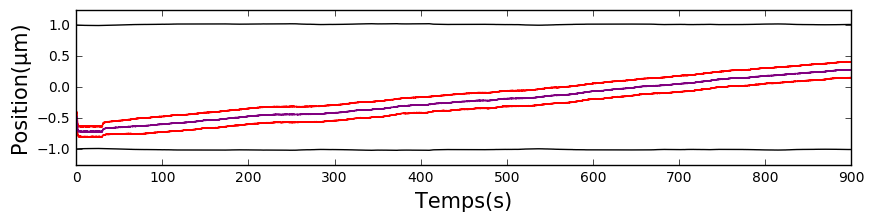

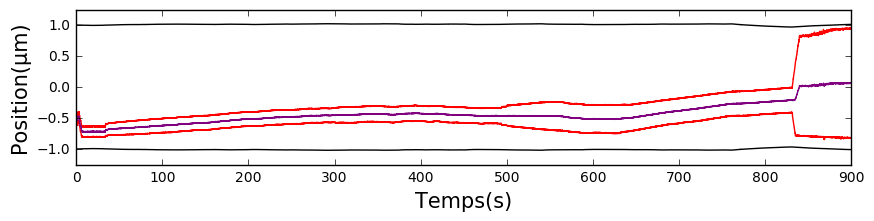

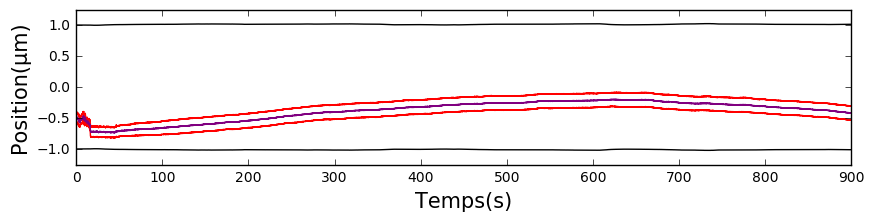

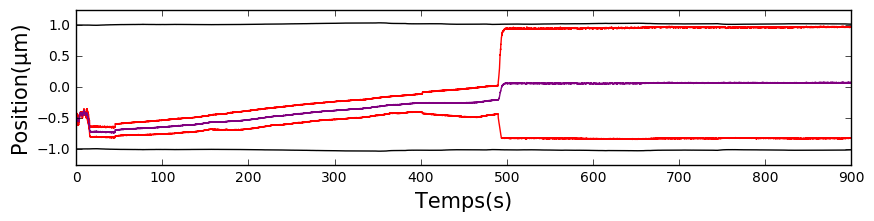

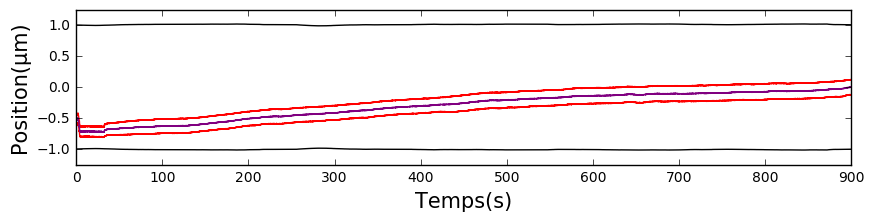

0017_0800_005_005_200_090


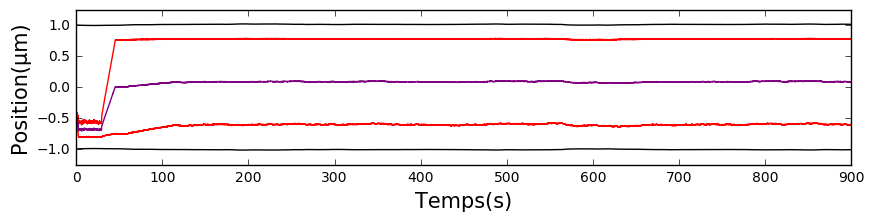

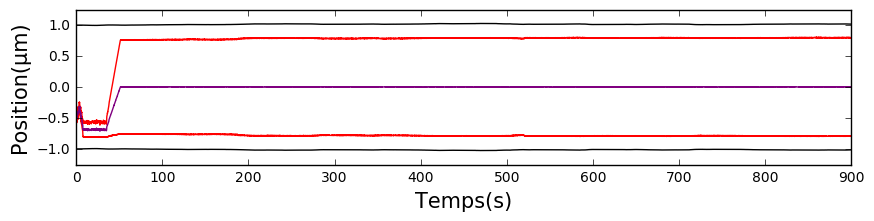

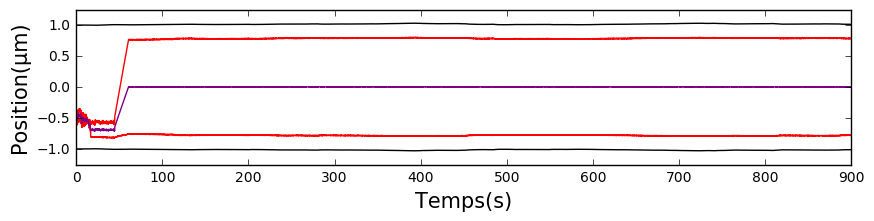

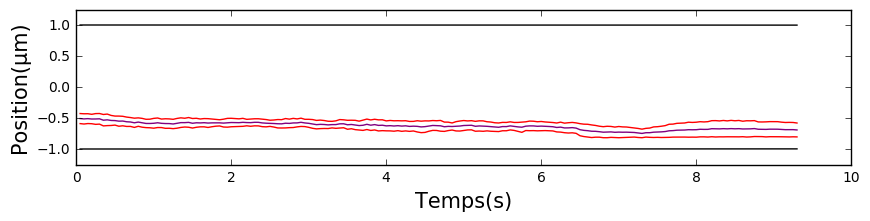

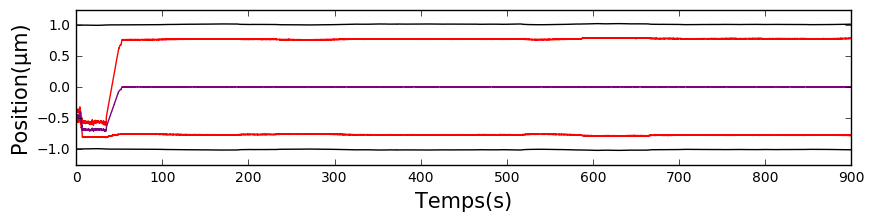

1600_0800_005_120_200_050


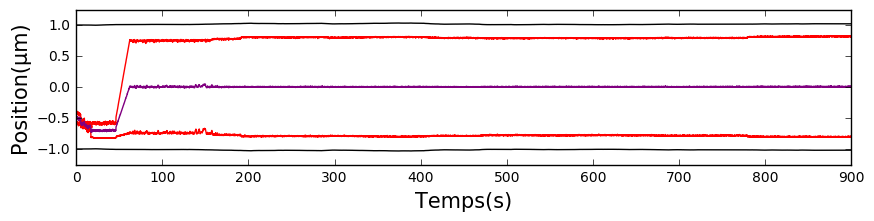

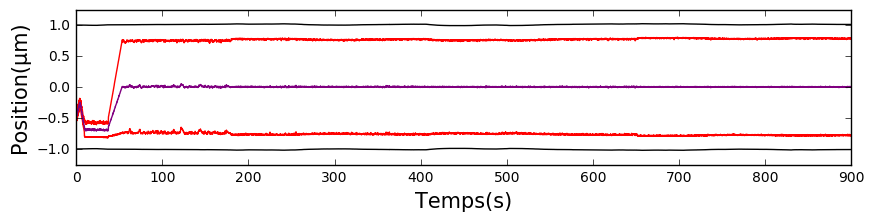

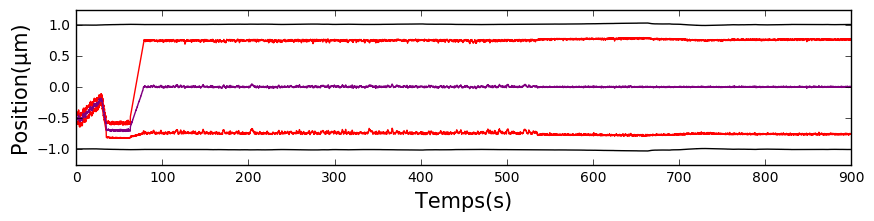

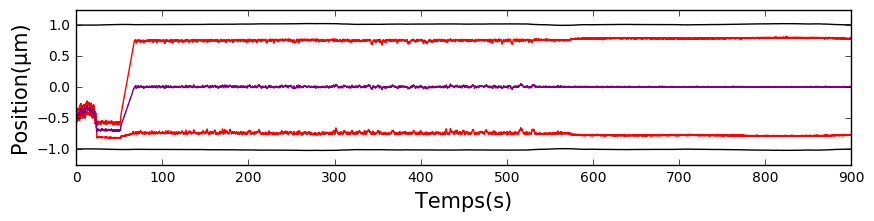

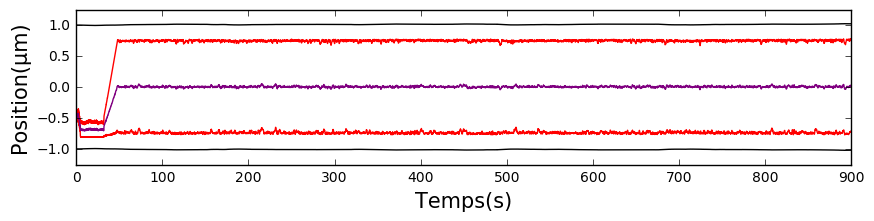

0800_0800_005_250_200_010


In [ ]:
#os.chdir("/home/sophie/Documents/GIT/cytosim/simulation/")
os.chdir("/home/sophie/Bureau/simulation/simulation/")
list_jeuDonnees = os.listdir()

for jeuDonnees in list_jeuDonnees : 
    list_run = os.listdir(jeuDonnees)
    print (jeuDonnees)
    #for run in ["run1","run2","run3"]:
    for run in list_run:
        solid  = open(jeuDonnees+'/'+run+"/solid.txt")
        data_solid = pd.read_table(solid, sep='\t', header=0, index_col=False, lineterminator='\n')


        # Normalise la position des kinetochores par rapport à l'axe pôle-pôle
        spindle_length = distance(data_solid["x"  ], data_solid["y"  ],\
                                  data_solid["x.1"], data_solid["y.1"])
        spb1_pos = -spindle_length/2
        spb2_pos =  spindle_length/2
        kt1_pos  = spb1_pos + distance(data_solid["x.1"], data_solid["y.1"],\
                                       data_solid["x.2"], data_solid["y.2"])
        kt2_pos  = spb1_pos + distance(data_solid["x.1"], data_solid["y.1"],\
                                       data_solid["x.3"], data_solid["y.3"])

        solid.close()

        fig,ax = plt.subplots(figsize=(10,2))
        ax.plot(data_solid["time"],spb1_pos, "k")
        ax.plot(data_solid["time"],spb2_pos, "k")
        ax.plot(data_solid["time"],kt1_pos, "r")
        ax.plot(data_solid["time"],kt2_pos, "r")
        #ax.plot(data_solid["time"],([0]*len(time))[t0:t1], "gray")
        ax.plot(data_solid["time"],kt1_pos-(kt1_pos-kt2_pos)/2, "purple")
        #ax.set_xticks(pos)
        #ax.set_xticklabels(label, rotation='vertical')
        ax.set_ylim([-1.25,1.25])
        ax.set_ylabel('Position(µm)', fontsize=15)
        ax.set_xlabel('Temps(s)', fontsize=15)

        plt.show()

run2


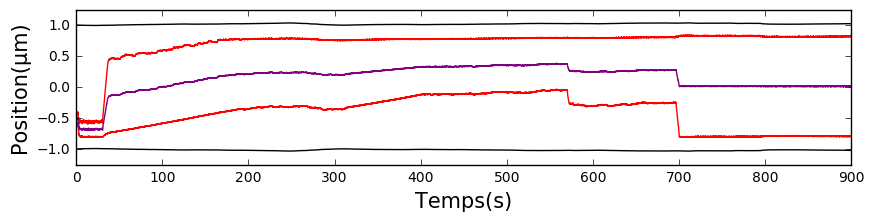

run4


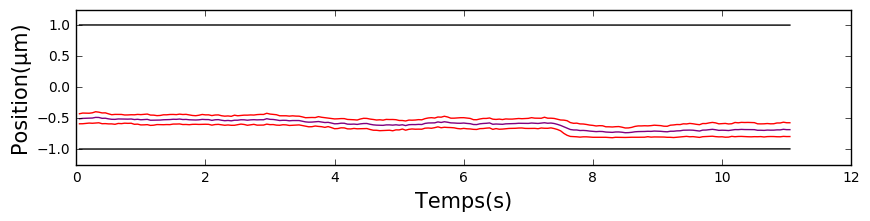

run3


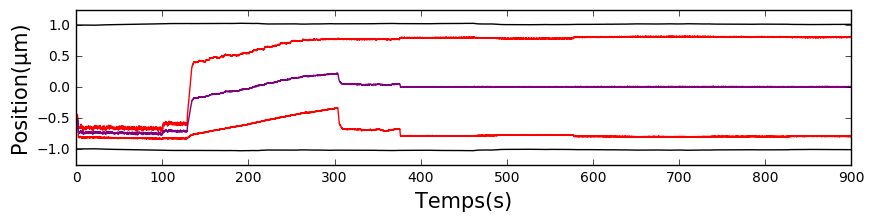

run5


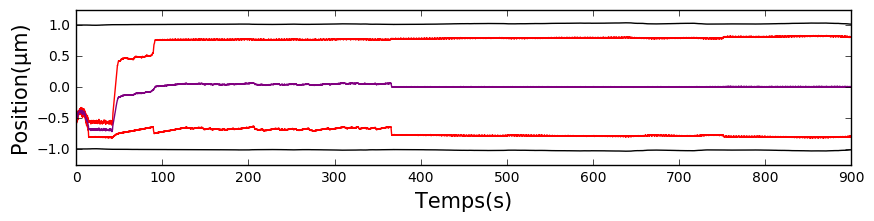

run1


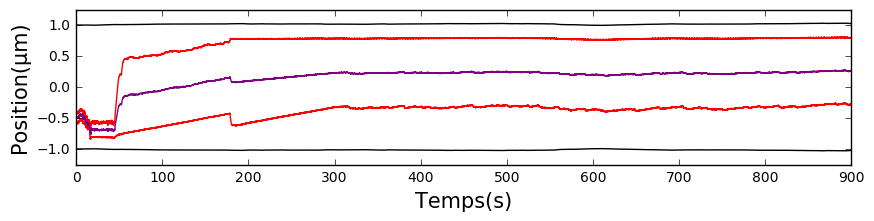

In [56]:
#os.chdir("/media/sophie/Sophie_Cytosim/CytosimSimulationsServeur/0800_1600_005_120_100_090/")
#os.chdir("/home/sophie/Documents/GIT/cytosim/cytosim-public.5042/SimulationOscillation/metaphase0")
os.chdir("/home/sophie/Bureau/simulation/simulation/0017_1600_005_005_100_090/")
#os.chdir("/media/sophie/Sophie_Cytosim/ResultatsPreliminaires/0800_1600_005_250_100_090/")
list_run=os.listdir()
for run in list_run:
    print (run)
    solid  = open(run+"/solid.txt")
    data_solid = pd.read_table(solid, sep='\t', header=0, index_col=False, lineterminator='\n')


    # Normalise la position des kinetochores par rapport à l'axe pôle-pôle
    spindle_length = distance(data_solid["x"  ], data_solid["y"  ],\
                              data_solid["x.1"], data_solid["y.1"])
    spb1_pos = -spindle_length/2
    spb2_pos =  spindle_length/2
    kt1_pos  = spb1_pos + distance(data_solid["x.1"], data_solid["y.1"],\
                                   data_solid["x.2"], data_solid["y.2"])
    kt2_pos  = spb1_pos + distance(data_solid["x.1"], data_solid["y.1"],\
                                   data_solid["x.3"], data_solid["y.3"])

    solid.close()

    fig,ax = plt.subplots(figsize=(10,2))
    ax.plot(data_solid["time"],spb1_pos, "k")
    ax.plot(data_solid["time"],spb2_pos, "k")
    ax.plot(data_solid["time"],kt1_pos, "r")
    ax.plot(data_solid["time"],kt2_pos, "r")
    #ax.plot(data_solid["time"],([0]*len(time))[t0:t1], "gray")
    ax.plot(data_solid["time"],kt1_pos-(kt1_pos-kt2_pos)/2, "purple")
    #ax.set_xticks(pos)
    #ax.set_xticklabels(label, rotation='vertical')
    ax.set_ylim([-1.25,1.25])
    ax.set_ylabel('Position(µm)', fontsize=15)
    ax.set_xlabel('Temps(s)', fontsize=15)

    plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(data_solid["x"],data_solid["y"], "k")
ax.plot(data_solid["x.1"],data_solid["y.1"], "k")
ax.plot(data_solid["x.2"],data_solid["y.2"], "r")
ax.plot(data_solid["x.3"],data_solid["y.3"], "r")

#ax.set_xticks(pos)
#ax.set_xticklabels(label, rotation='vertical')
ax.set_ylim([-1.25,1.25])
ax.set_ylabel('Position(µm)', fontsize=15)
ax.set_xlabel('Temps(s)', fontsize=15)

plt.show()

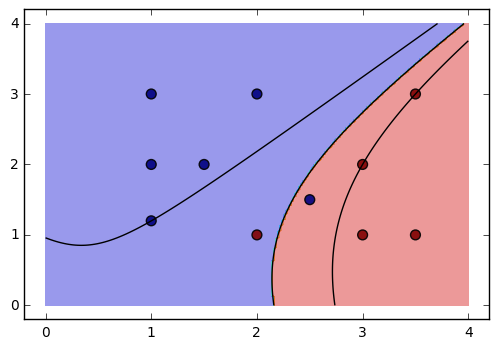

In [38]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm

x = np.array([[1,3],[1,2],[1,1.2],[1.5,2],[2,3],[2.5,1.5],[2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5
svc = svm.SVC(kernel='poly',C=1).fit(x,y)

X,Y = np.mgrid[0:4:200j,0:4:200j]
Z=svc.decision_function(np.c_[X.ravel(), Y.ravel()])
Z=Z.reshape(X.shape)
plt.contourf(X,Y,Z>0, alpha=0.4)
plt.contour(X,Y,Z, colors=['k','k','k'], linestypes=['--','-','--'], levels=[-1,0,1])
#plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1],s=120, facecolors='none')
plt.scatter(x[:,0],x[:,1],c=y, s=50, alpha=0.9)
plt.show()